# DATA Reduction 

The purpose of this Notebook is to perform the Reduction pipeline for each samples (ie classified by dates) divided in 3 steps:
- DR1: Sanity Check Merging
- DR2: Baseline Correction
- DR3: Integration Normalisation

## Workflow

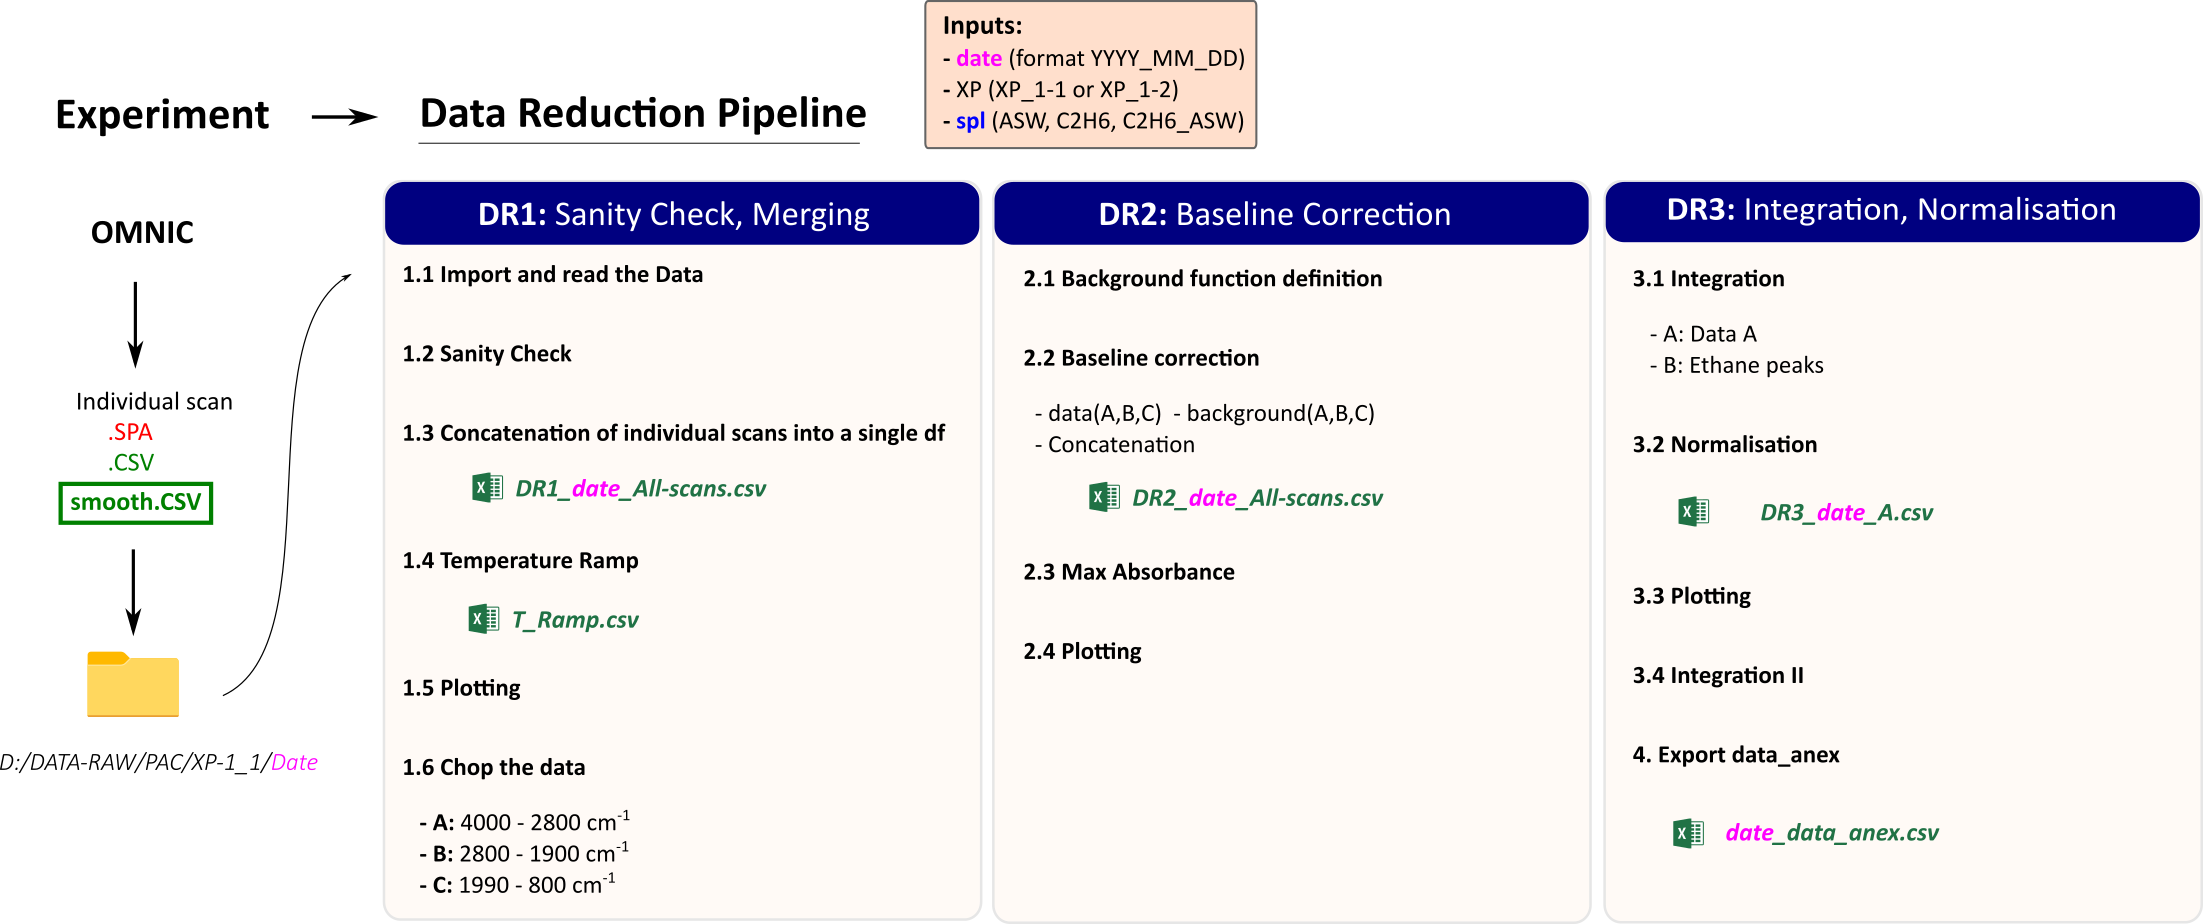

to update

### Libraries

In [1556]:
import numpy 
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import glob
from functools import reduce
import ipywidgets as widgets
import matplotlib.gridspec as gridspec
from datetime import datetime


# 0 Experiment parameters

One of the aim here is to input those parameters from a "master Notebook" allowing batch processing of multiple samples

## 0.1 Date

In [1557]:
date = "2021_05_13"


## 0.2 XP

In [1558]:
# Can take value XP_1-1, XP_1-2 

XP = "XP_1-1"

## 0.3 Sample type

In [1559]:
# Can take value ASW, C2H6, C2H6_ASW

spl = "ASW"

# <span style='background :yellow' > $\color{green}{\text{DR1 : Sanity Check and Merging}}$ </span>

I have one individual csv for each experimental scan (smoothed by omnic) called: ASW_2020_09_15_0001_smooth and located in the folder "D:\DATA-RAW\PAC\XP_1-1/2020_09_15/"   

Purpose :

- Import all the data 
- Create one data frame for each spectrum and add header (wavenumber, spectrum title)  
- merge all the data frame and create one big with (wavenumber, 0001, 0002, 0003, ...)
- Also during this phase a new csv will be created with various data that we aquired from the sample processing and named data_anex.csv

All the outputs generated will be located in the following folder: D:\PhD-WS\Projects\PAC\XP_1-1\DATA\2020_09_15\ and we expect two types of outputs:
- Data
- Plots


## 1.1 Import and read the data

In [1560]:
file_path = "D:\DATA-RAW\PAC\{}/{}/*_smooth.csv".format(XP,date)

#### Iterator

In [1561]:
file_number = 1

#### Empty lists

In [1562]:
# List within which all the individual scans will be added prior to merging
All_data_frame = []

# List where all the "data annex" (ie max absorbance ...), will be stored 
data_anex = []

#Temperature Ramp that the sample experienced (need to be entered manually later)
T_ramp = []

# Data annex values
data_max = []
minimum_1 = []
minimum_1_index = []
minimum_2 = []
minimum_2_index = []
minimum_3 = []
minimum_3_index = []
minimum_4 = []
minimum_4_index = []
minimum_5 = []
minimum_5_index = []
minimum_6 = []
minimum_6_index = []

maximum = []
maximum_index = []


#### For loop 

In [1563]:
for file in glob.glob(file_path):

    df = pd.read_csv(file, names=["Wavenumber", str(spl)+"_"+str(date)+"_"+str(file_number)])
    
    All_data_frame.append(df) 

    #Min 4000 - 3800 wavenumber
    
    min1 = df.iloc[6223:6639,1].astype(float).min()
    min1_index= df.iloc[6223:6639,1].astype(float).idxmin()
    
    #Min 3000 - 2800 wavenumber
    
    min2 = df.iloc[4149:4564,1].astype(float).min()
    min2_index = df.iloc[4149:4564,1].astype(float).idxmin()
    
    #Min 2800 - 2700 wavenumber
    
    min3 = df.iloc[3941:4149,1].astype(float).min()
    min3_index= df.iloc[3941:4149,1].astype(float).idxmin()
    
    #Min 2000 - 1900 wavenumber
    
    min4 = df.iloc[2282:2490,1].astype(float).min()
    min4_index = df.iloc[2282:2490,1].astype(float).idxmin()
    
    #Min 2800 - 2700 wavenumber
    
    min3 = df.iloc[3941:4149,1].astype(float).min()
    min3_index= df.iloc[3941:4149,1].astype(float).idxmin()
    
    #Min 2000 - 1900 wavenumber
    
    min4 = df.iloc[2282:2490,1].astype(float).min()
    min4_index = df.iloc[2282:2490,1].astype(float).idxmin()
    
    #Min 1900 - 1800 wavenumber
    
    min5 = df.iloc[2075:2282,1].astype(float).min()
    min5_index= df.iloc[2075:2282,1].astype(float).idxmin()
    
    #Min 1300 - 800 wavenumber
    
    min6 = df.iloc[0:1038,1].astype(float).min()
    min6_index = df.iloc[0:1038,1].astype(float).idxmin()
    
    maxi = df.iloc[4149:6639,1].astype(float).max()
    maxi_index= df.iloc[4149:6639,1].astype(float).idxmax()
    

    #Wavenumber.append(Wav)    
    #RAW_data.append(RAW)
    
    minimum_1.append(min1)
    minimum_1_index.append(min1_index)
    
    minimum_2.append(min2)
    minimum_2_index.append(min2_index)
    
    minimum_3.append(min3)
    minimum_3_index.append(min3_index)
    
    minimum_4.append(min3)
    minimum_4_index.append(min3_index)
    
    minimum_5.append(min5)
    minimum_5_index.append(min5_index)
    
    minimum_6.append(min6)
    minimum_6_index.append(min6_index)
    
    maximum.append(maxi)
    maximum_index.append(maxi_index)
        
    data_anex.append(
        
        {

            'Name' : str(spl)+"_"+str(date)+"_" + str(file_number),
            'min1' : min1,
            'index1' :  min1_index,
            'min2' : min2,
            'index2' :  min2_index,
            'min3' : min3,
            'index3' :  min3_index,
            'min4' : min4,
            'index4' :  min4_index,
            'min5' : min5,
            'index5' :  min5_index,
            'min6' : min6,
            'index6' :  min6_index,
            'max' : maxi,
            'max_index' :  maxi_index,
        })
    


    
    file_number +=1

## 1.2 Sanity Check

### 1.2.1 All Data

Check that the list has the same number of scans, and that every scan has 6639 rows

In [1564]:
All_data_frame

[      Wavenumber  ASW_2021_05_13_1
 0       799.8442          0.069635
 1       800.3264          0.069150
 2       800.8085          0.068547
 3       801.2906          0.066959
 4       801.7727          0.066662
 ...          ...               ...
 6634   3998.2570         -0.014595
 6635   3998.7390         -0.014566
 6636   3999.2210         -0.014556
 6637   3999.7030         -0.014677
 6638   4000.1850         -0.014722
 
 [6639 rows x 2 columns],
       Wavenumber  ASW_2021_05_13_2
 0       799.8442          0.070803
 1       800.3264          0.070645
 2       800.8085          0.070307
 3       801.2906          0.068691
 4       801.7727          0.068221
 ...          ...               ...
 6634   3998.2570         -0.013468
 6635   3998.7390         -0.013438
 6636   3999.2210         -0.013415
 6637   3999.7030         -0.013496
 6638   4000.1850         -0.013514
 
 [6639 rows x 2 columns],
       Wavenumber  ASW_2021_05_13_3
 0       799.8442          0.078662
 1      

### 1.2.2 Data Annex

In [1565]:
data_anex_df = pd.DataFrame(data_anex)

In [1566]:
data_anex_df.head(5)

Name      min1  index1      min2  index2      min3  index3  \
0  ASW_2021_05_13_1 -0.014722    6638 -0.004114    4151 -0.004143    4140   
1  ASW_2021_05_13_2 -0.013557    6630 -0.003223    4209 -0.003271    4140   
2  ASW_2021_05_13_3 -0.012140    6636 -0.002166    4153 -0.002128    4134   
3  ASW_2021_05_13_4 -0.011840    6636 -0.001680    4153 -0.001689    4134   
4  ASW_2021_05_13_5 -0.011791    6636 -0.001560    4153 -0.001565    4134   

       min4  index4      min5  index5      min6  index6       max  max_index  
0  0.002053    2392  0.002395    2276  0.006344     477  0.268766       5120  
1  0.002862    2392  0.003149    2276  0.006977     463  0.270903       5120  
2  0.003635    2390  0.003998    2275  0.006063     496  0.320648       5101  
3  0.004012    2447  0.004475    2273  0.006181     467  0.333521       5099  
4  0.004190    2388  0.004680    2273  0.006330     467  0.336216       5099

## 1.3 Concatenation into one big csv

In [1567]:
All_RAW_df = reduce(lambda left,right: pd.merge(left,right, on=['Wavenumber'],how='outer'), All_data_frame)

In [1568]:
pd.DataFrame(All_RAW_df)

Wavenumber  ASW_2021_05_13_1  ASW_2021_05_13_2  ASW_2021_05_13_3  \
0       799.8442          0.069635          0.070803          0.078662   
1       800.3264          0.069150          0.070645          0.074942   
2       800.8085          0.068547          0.070307          0.069735   
3       801.2906          0.066959          0.068691          0.063575   
4       801.7727          0.066662          0.068221          0.063871   
...          ...               ...               ...               ...   
6634   3998.2570         -0.014595         -0.013468         -0.011945   
6635   3998.7390         -0.014566         -0.013438         -0.012043   
6636   3999.2210         -0.014556         -0.013415         -0.012140   
6637   3999.7030         -0.014677         -0.013496         -0.011767   
6638   4000.1850         -0.014722         -0.013514         -0.011276   

      ASW_2021_05_13_4  ASW_2021_05_13_5  ASW_2021_05_13_6  ASW_2021_05_13_7  \
0             0.081198          0.083307          0.082718          0.080604   
1             0.078147          0.080280          0.079097          0.080174   
2             0.073422          0.075741          0.073966          0.078301   
3             0.065501          0.067977          0.066375          0.071228   
4             0.064520          0.066492          0.065588          0.069532   
...                ...               ...               ...               ...   
6634         -0.011508         -0.011431         -0.011053         -0.012358   
6635         -0.011675         -0.011610         -0.011223         -0.012435   
6636         -0.011840         -0.011791         -0.011443         -0.012548   
6637         -0.011123         -0.011118         -0.010725         -0.012519   
6638         -0.010244         -0.010266         -0.009814         -0.012313   

      ASW_2021_05_13_8  ASW_2021_05_13_9  ...  ASW_2021_05_13_838  \
0             0.081269          0.079710  ...            0.090741   
1             0.082986          0.082341  ...            0.089367   
2             0.082874          0.083144  ...            0.087323   
3             0.072628          0.072857  ...            0.085501   
4             0.067802          0.068290  ...            0.083946   
...                ...               ...  ...                 ...   
6634         -0.014378         -0.014626  ...           -0.000744   
6635         -0.014550         -0.014809  ...           -0.000754   
6636         -0.014743         -0.014998  ...           -0.000700   
6637         -0.014141         -0.014470  ...           -0.001103   
6638         -0.013281         -0.013670  ...           -0.001219   

      ASW_2021_05_13_839  ASW_2021_05_13_840  ASW_2021_05_13_841  \
0               0.085825            0.081287            0.077290   
1               0.084261            0.079909            0.076536   
2               0.082613            0.077456            0.075329   
3               0.080906            0.075228            0.074134   
4               0.079877            0.074234            0.072727   
...                  ...                 ...                 ...   
6634            0.001204            0.003410            0.005089   
6635            0.001134            0.003363            0.005049   
6636            0.001189            0.003468            0.005135   
6637            0.000582            0.002855            0.004543   
6638            0.000295            0.002538            0.004256   

      ASW_2021_05_13_842  ASW_2021_05_13_843  ASW_2021_05_13_844  \
0               0.073891            0.069322            0.066090   
1               0.072063            0.067917            0.064834   
2               0.069836            0.066021            0.062821   
3               0.068899            0.064946            0.061459   
4               0.067862            0.063550            0.060590   
...                  ...                 ...                 ...   
6634            0.006522          

#### CSV Export

In [1569]:
All_RAW_df.to_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Data\DR\DR1_{0}_All-scans.csv'.format(date))

## 1.4 Temperature ramp 

$\color{red}{\text{Implement manually !}}$


In [1571]:
T_ramp.append(
        
        {
            'Sample' : str(spl),
            'Date' : str(date),
            '20' : numpy.arange(1, 3, 1).tolist(),
            '30' : "",
            '40' : "",
            '50' : "",
            '60' : "",
            '70' : numpy.arange(3, 7, 1).tolist(),
            '80' : "",
            '90' : "",
            '100' : "",
            '110' :"",
            '120' : "",
            '125' : "",
            '130' : numpy.arange(7, 832, 1).tolist(),
            '132' : "",
            '134' : "",
            '135' : "",
            '136' : "",
            '137' : "",
            '138' : "",
            '140' : numpy.arange(832, 843, 1).tolist(),
            '142' : numpy.arange(843, 854, 1).tolist(),
            '145' : numpy.arange(854, 862, 1).tolist(),
            '150' : numpy.arange(862, 872, 1).tolist(),
            '155' : "",
            '160' : "",
            '180' : "",
            '200' : "",

            })

$\color{red}{\text{When export done add 1 column --> to supress manualy}}$

#### Sanity Check

In [1572]:
T_ramp_df = pd.DataFrame(T_ramp)

In [1573]:
T_ramp_df

Sample        Date      20 30 40 50 60            70 80 90  ... 137 138  \
0    ASW  2021_05_13  [1, 2]              [3, 4, 5, 6]        ...           

                                                 140  \
0  [832, 833, 834, 835, 836, 837, 838, 839, 840, ...   

                                                 142  \
0  [843, 844, 845, 846, 847, 848, 849, 850, 851, ...   

                                        145  \
0  [854, 855, 856, 857, 858, 859, 860, 861]   

                                                 150 155 160 180 200  
0  [862, 863, 864, 865, 866, 867, 868, 869, 870, ...                  

[1 rows x 29 columns]

#### Append T_Ramp df to main XP file.csv

We want to append T_ramp_df to XP_file, only if the date is not already present

In [1574]:
XP_Ramp_df = pd.read_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\XP_list_test.csv')

In [1575]:
XP_Ramp_df

Sample        Date       20K            30K            40K  \
0    ASW  2020_09_15        [1]           NaN            NaN   
1    ASW  2020_09_16     [1, 2]           NaN      [3, 4, 5]   
2    ASW  2020_09_17     [1, 2]           NaN      [3, 4, 5]   
3    ASW  2020_09_21     [1, 2]           NaN      [3, 4, 5]   
4    ASW  2020_09_28     [1, 2]  [3, 4, 5, 6]  [7, 8, 9, 10]   
5    ASW  2020_10_22     [1, 2]           NaN            NaN   
6    ASW  2020_11_16     [1, 2]           NaN            NaN   
7    ASW  2020_11_19     [1, 2]           NaN            NaN   
8    ASW  2021_05_24  [1, 2, 3]           NaN            NaN   

                50K                        60K  \
0               NaN                        NaN   
1               NaN                  [6, 7, 8]   
2               NaN                  [6, 7, 8]   
3               NaN                  [6, 7, 8]   
4  [11, 12, 13, 14]           [15, 16, 17, 18]   
5               NaN                        NaN   
6               NaN                  [3, 4, 5]   
7               NaN  [3, 4, 5, 6, 7, 8, 9, 10]   
8               NaN                        NaN   

                                                 70K               80K  \
0                                                NaN               NaN   
1                                                NaN       [9, 10, 11]   
2                                                NaN       [9, 10, 11]   
3                                                NaN       [9, 10, 11]   
4                                   [19, 20, 21, 22]  [23, 24, 25, 26]   
5                                                NaN               NaN   
6   [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]               NaN   
7  [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 2...               NaN   
8                                       [4, 5, 6, 7]               NaN   

                90K  ...              137K  \
0               NaN  ...               NaN   
1               NaN  ...               NaN   
2               NaN  ...               NaN   
3               NaN  ...               NaN   
4  [27, 28, 29, 30]  ...               NaN   
5               NaN  ...               NaN   
6               NaN  ...  [47, 48, 49, 50]   
7               NaN  ...               NaN   
8               NaN  ...               NaN   

                                                138K  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                       [45, 46, 47]   
6  [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 6...   
7                                                NaN   
8                                                NaN   

                                                140K              142K  \
0                                                [3]               NaN   
1                                       [21, 22, 23]               NaN   
2                                       [21, 22, 23]               NaN   
3                                       [21, 22, 23]               NaN   
4                                                NaN  [59, 60, 61, 62]   
5                                       [48, 49, 50]      [51, 52, 53]   
6                                       [65, 66, 67]               NaN   
7                                       [90, 91, 92]               NaN   
8  [393, 394, 395, 396, 397, 398, 399, 400, 401, ...               NaN   

                                                145K  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                   [63, 64, 65, 66]   
5                   

In [1576]:
XP_Date = []

XP_Date = str(XP_Ramp_df['Date'])
print(XP_Date)


0    2020_09_15
1    2020_09_16
2    2020_09_17
3    2020_09_21
4    2020_09_28
5    2020_10_22
6    2020_11_16
7    2020_11_19
8    2021_05_24
Name: Date, dtype: object


Conditions that state if date already exist, don`t append

In [1577]:
if date in XP_Date:
    print("Not appended")
else:
    T_ramp_df.to_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\XP_list_test.csv', mode='a', header=False)

#### Sanity Check

$\color{red}{\text{when csv read, new column is added on the previously appended samp}}$

Can be corrected manually

In [1578]:
#XP_file_df = pd.read_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\XP_list_test.csv')

In [1579]:
#XP_file_df

## 1.5 Plotting

C:\Users\vmrd3\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


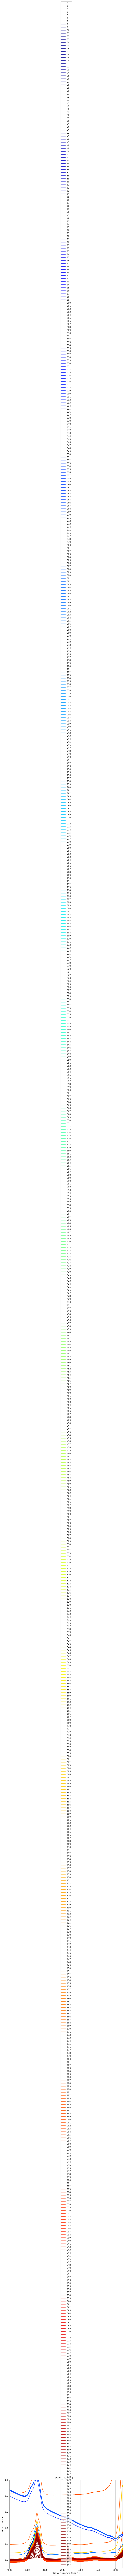

In [1580]:
nscan = len(list(All_RAW_df.columns.values.tolist()))


fig= plt.figure(figsize=(10,8))


i=1

for i in range(1,nscan):
    
    plt.plot(All_RAW_df.Wavenumber, All_RAW_df['ASW_{}_{}'.format(date, i)], c=cm.jet(i/nscan), label=f"{i}")
    
    i=+1
    

plt.title('{0} DR1 '.format(date))
plt.axis([4000,800,-0.1,1])
plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
plt.grid()
plt.legend()


#plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR1\DR1_{0}_All_scans.png'.format(date))

plt.show()

## 1.6 Chop the data

Data is choped in 3 range:
- OH stretch : (4000 - 2800 cm-1)
- Combination bands : (2800 - 1900 cm-1)
- Bending modes : (1900 - 800 cm-1)

### 1.5.1 OH Stretch

In [1581]:
DR1_A_df = All_RAW_df[4149:6639]

In [1582]:
DR1_A_df

Wavenumber  ASW_2021_05_13_1  ASW_2021_05_13_2  ASW_2021_05_13_3  \
4149    2800.178         -0.004078         -0.003182         -0.001946   
4150    2800.660         -0.004097         -0.003198         -0.001942   
4151    2801.142         -0.004114         -0.003204         -0.002133   
4152    2801.624         -0.004079         -0.003159         -0.002061   
4153    2802.106         -0.004055         -0.003134         -0.002166   
...          ...               ...               ...               ...   
6634    3998.257         -0.014595         -0.013468         -0.011945   
6635    3998.739         -0.014566         -0.013438         -0.012043   
6636    3999.221         -0.014556         -0.013415         -0.012140   
6637    3999.703         -0.014677         -0.013496         -0.011767   
6638    4000.185         -0.014722         -0.013514         -0.011276   

      ASW_2021_05_13_4  ASW_2021_05_13_5  ASW_2021_05_13_6  ASW_2021_05_13_7  \
4149         -0.001430         -0.001308         -0.001058         -0.002912   
4150         -0.001424         -0.001308         -0.001057         -0.002915   
4151         -0.001606         -0.001485         -0.001243         -0.003044   
4152         -0.001560         -0.001438         -0.001210         -0.002986   
4153         -0.001680         -0.001560         -0.001341         -0.003053   
...                ...               ...               ...               ...   
6634         -0.011508         -0.011431         -0.011053         -0.012358   
6635         -0.011675         -0.011610         -0.011223         -0.012435   
6636         -0.011840         -0.011791         -0.011443         -0.012548   
6637         -0.011123         -0.011118         -0.010725         -0.012519   
6638         -0.010244         -0.010266         -0.009814         -0.012313   

      ASW_2021_05_13_8  ASW_2021_05_13_9  ...  ASW_2021_05_13_838  \
4149         -0.004872         -0.005292  ...            0.003653   
4150         -0.004909         -0.005342  ...            0.003758   
4151         -0.004982         -0.005416  ...            0.003622   
4152         -0.005003         -0.005445  ...            0.003767   
4153         -0.005062         -0.005496  ...            0.003662   
...                ...               ...  ...                 ...   
6634         -0.014378         -0.014626  ...           -0.000744   
6635         -0.014550         -0.014809  ...           -0.000754   
6636         -0.014743         -0.014998  ...           -0.000700   
6637         -0.014141         -0.014470  ...           -0.001103   
6638         -0.013281         -0.013670  ...           -0.001219   

      ASW_2021_05_13_839  ASW_2021_05_13_840  ASW_2021_05_13_841  \
4149            0.005208            0.006856            0.008062   
4150            0.005332            0.006985            0.008197   
4151            0.005209            0.006858            0.008066   
4152            0.005391            0.007038            0.008236   
4153            0.005280            0.006933            0.008116   
...                  ...                 ...                 ...   
6634            0.001204            0.003410            0.005089   
6635            0.001134            0.003363            0.005049   
6636            0.001189            0.003468            0.005135   
6637            0.000582            0.002855            0.004543   
6638            0.000295            0.002538            0.004256   

      ASW_2021_05_13_842  ASW_2021_05_13_843  ASW_2021_05_13_844  \
4149            0.009022            0.010093            0.011004   
4150            0.009159            0.010243            0.011135   
4151            0.009041            0.010121            0.010998   
4152            0.009224            0.010304            0.011168   
4153            0.009115            0.010192            0.011053   
...                  ...                 ...                 ...   
6634            0.006522          

#### Export as csv

In [1583]:
#DR1_A_df.to_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Data\DR\DR1_{0}_A.csv'.format(date))

### 1.5.2 Combination bands

In [1584]:
DR1_B_df = All_RAW_df[2282:4150]

In [1585]:
DR1_B_df

Wavenumber  ASW_2021_05_13_1  ASW_2021_05_13_2  ASW_2021_05_13_3  \
2282    1900.052          0.002504          0.003252          0.004176   
2283    1900.534          0.002476          0.003224          0.004070   
2284    1901.016          0.002404          0.003168          0.003960   
2285    1901.498          0.002383          0.003161          0.003939   
2286    1901.980          0.002345          0.003141          0.003940   
...          ...               ...               ...               ...   
4145    2798.250         -0.003997         -0.003086         -0.001946   
4146    2798.732         -0.003987         -0.003085         -0.001832   
4147    2799.214         -0.003993         -0.003100         -0.001835   
4148    2799.696         -0.004032         -0.003141         -0.001798   
4149    2800.178         -0.004078         -0.003182         -0.001946   

      ASW_2021_05_13_4  ASW_2021_05_13_5  ASW_2021_05_13_6  ASW_2021_05_13_7  \
2282          0.004391          0.004587          0.004822          0.004217   
2283          0.004451          0.004653          0.004890          0.003667   
2284          0.004403          0.004606          0.004849          0.003331   
2285          0.004581          0.004791          0.005041          0.003149   
2286          0.004594          0.004809          0.005056          0.003320   
...                ...               ...               ...               ...   
4145         -0.001525         -0.001385         -0.001156         -0.002922   
4146         -0.001442         -0.001302         -0.001072         -0.002844   
4147         -0.001389         -0.001249         -0.001019         -0.002828   
4148         -0.001335         -0.001207         -0.000968         -0.002812   
4149         -0.001430         -0.001308         -0.001058         -0.002912   

      ASW_2021_05_13_8  ASW_2021_05_13_9  ...  ASW_2021_05_13_838  \
2282          0.003358          0.003101  ...            0.009728   
2283          0.002983          0.002810  ...            0.009159   
2284          0.002644          0.002519  ...            0.008553   
2285          0.002135          0.002073  ...            0.008052   
2286          0.002000          0.001921  ...            0.007943   
...                ...               ...  ...                 ...   
4145         -0.004958         -0.005365  ...            0.003736   
4146         -0.004947         -0.005362  ...            0.003812   
4147         -0.004847         -0.005262  ...            0.003727   
4148         -0.004867         -0.005291  ...            0.003793   
4149         -0.004872         -0.005292  ...            0.003653   

      ASW_2021_05_13_839  ASW_2021_05_13_840  ASW_2021_05_13_841  \
2282            0.010065            0.010357            0.010496   
2283            0.009625            0.009914            0.010034   
2284            0.008998            0.009297            0.009397   
2285            0.008490            0.008802            0.008877   
2286            0.008260            0.008593            0.008668   
...                  ...                 ...                 ...   
4145            0.005304            0.006967            0.008148   
4146            0.005378            0.007035            0.008226   
4147            0.005287            0.006939            0.008129   
4148            0.005351            0.006999            0.008197   
4149            0.005208            0.006856            0.008062   

      ASW_2021_05_13_842  ASW_2021_05_13_843  ASW_2021_05_13_844  \
2282            0.010626            0.010742            0.011003   
2283            0.010165            0.010268            0.010526   
2284            0.009545            0.009647            0.009903   
2285            0.009033            0.009135            0.009380   
2286            0.008828            0.008941            0.009187   
...                  ...                 ...                 ...   
4145            0.009132          

#### Export as csv

In [1586]:
#DR1_B_df.to_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Data\DR\DR1_{0}_B.csv'.format(date))

### 1.5.3 bending modes

In [1587]:
DR1_C_df = All_RAW_df[0:2283]

In [1588]:
DR1_C_df

Wavenumber  ASW_2021_05_13_1  ASW_2021_05_13_2  ASW_2021_05_13_3  \
0       799.8442          0.069635          0.070803          0.078662   
1       800.3264          0.069150          0.070645          0.074942   
2       800.8085          0.068547          0.070307          0.069735   
3       801.2906          0.066959          0.068691          0.063575   
4       801.7727          0.066662          0.068221          0.063871   
...          ...               ...               ...               ...   
2278   1898.1230          0.002458          0.003194          0.004175   
2279   1898.6050          0.002504          0.003242          0.004236   
2280   1899.0880          0.002526          0.003277          0.004303   
2281   1899.5700          0.002534          0.003285          0.004257   
2282   1900.0520          0.002504          0.003252          0.004176   

      ASW_2021_05_13_4  ASW_2021_05_13_5  ASW_2021_05_13_6  ASW_2021_05_13_7  \
0             0.081198          0.083307          0.082718          0.080604   
1             0.078147          0.080280          0.079097          0.080174   
2             0.073422          0.075741          0.073966          0.078301   
3             0.065501          0.067977          0.066375          0.071228   
4             0.064520          0.066492          0.065588          0.069532   
...                ...               ...               ...               ...   
2278          0.004732          0.004931          0.005108          0.004143   
2279          0.004725          0.004927          0.005108          0.004367   
2280          0.004591          0.004791          0.004990          0.004711   
2281          0.004544          0.004746          0.004965          0.004450   
2282          0.004391          0.004587          0.004822          0.004217   

      ASW_2021_05_13_8  ASW_2021_05_13_9  ...  ASW_2021_05_13_838  \
0             0.081269          0.079710  ...            0.090741   
1             0.082986          0.082341  ...            0.089367   
2             0.082874          0.083144  ...            0.087323   
3             0.072628          0.072857  ...            0.085501   
4             0.067802          0.068290  ...            0.083946   
...                ...               ...  ...                 ...   
2278          0.002284          0.002088  ...            0.008622   
2279          0.002598          0.002375  ...            0.009199   
2280          0.003118          0.002834  ...            0.009753   
2281          0.003247          0.002981  ...            0.009891   
2282          0.003358          0.003101  ...            0.009728   

      ASW_2021_05_13_839  ASW_2021_05_13_840  ASW_2021_05_13_841  \
0               0.085825            0.081287            0.077290   
1               0.084261            0.079909            0.076536   
2               0.082613            0.077456            0.075329   
3               0.080906            0.075228            0.074134   
4               0.079877            0.074234            0.072727   
...                  ...                 ...                 ...   
2278            0.008785            0.009061            0.009208   
2279            0.009379            0.009659            0.009806   
2280            0.009902            0.010198            0.010348   
2281            0.010161            0.010456            0.010601   
2282            0.010065            0.010357            0.010496   

      ASW_2021_05_13_842  ASW_2021_05_13_843  ASW_2021_05_13_844  \
0               0.073891            0.069322            0.066090   
1               0.072063            0.067917            0.064834   
2               0.069836            0.066021            0.062821   
3               0.068899            0.064946            0.061459   
4               0.067862            0.063550            0.060590   
...                  ...                 ...                 ...   
2278            0.009319          

#### Export as csv

In [1589]:
#DR1_C_df.to_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Data\DR\DR1_{0}_C.csv'.format(date))

# <span style='background :yellow' > $\color{green}{\text{DR2 : Baseline Correction}}$ </span>

Dataframe list so far:
- All_RAW_df
- T_ramp_df
- data_annex_df
- DR1_A_df
- DR1_B_df
- DR1_C_df

#### Empty List

In [1590]:
maxA = []
maxAi = []

#### Data check

In [1591]:
DR1_A_df

Wavenumber  ASW_2021_05_13_1  ASW_2021_05_13_2  ASW_2021_05_13_3  \
4149    2800.178         -0.004078         -0.003182         -0.001946   
4150    2800.660         -0.004097         -0.003198         -0.001942   
4151    2801.142         -0.004114         -0.003204         -0.002133   
4152    2801.624         -0.004079         -0.003159         -0.002061   
4153    2802.106         -0.004055         -0.003134         -0.002166   
...          ...               ...               ...               ...   
6634    3998.257         -0.014595         -0.013468         -0.011945   
6635    3998.739         -0.014566         -0.013438         -0.012043   
6636    3999.221         -0.014556         -0.013415         -0.012140   
6637    3999.703         -0.014677         -0.013496         -0.011767   
6638    4000.185         -0.014722         -0.013514         -0.011276   

      ASW_2021_05_13_4  ASW_2021_05_13_5  ASW_2021_05_13_6  ASW_2021_05_13_7  \
4149         -0.001430         -0.001308         -0.001058         -0.002912   
4150         -0.001424         -0.001308         -0.001057         -0.002915   
4151         -0.001606         -0.001485         -0.001243         -0.003044   
4152         -0.001560         -0.001438         -0.001210         -0.002986   
4153         -0.001680         -0.001560         -0.001341         -0.003053   
...                ...               ...               ...               ...   
6634         -0.011508         -0.011431         -0.011053         -0.012358   
6635         -0.011675         -0.011610         -0.011223         -0.012435   
6636         -0.011840         -0.011791         -0.011443         -0.012548   
6637         -0.011123         -0.011118         -0.010725         -0.012519   
6638         -0.010244         -0.010266         -0.009814         -0.012313   

      ASW_2021_05_13_8  ASW_2021_05_13_9  ...  ASW_2021_05_13_838  \
4149         -0.004872         -0.005292  ...            0.003653   
4150         -0.004909         -0.005342  ...            0.003758   
4151         -0.004982         -0.005416  ...            0.003622   
4152         -0.005003         -0.005445  ...            0.003767   
4153         -0.005062         -0.005496  ...            0.003662   
...                ...               ...  ...                 ...   
6634         -0.014378         -0.014626  ...           -0.000744   
6635         -0.014550         -0.014809  ...           -0.000754   
6636         -0.014743         -0.014998  ...           -0.000700   
6637         -0.014141         -0.014470  ...           -0.001103   
6638         -0.013281         -0.013670  ...           -0.001219   

      ASW_2021_05_13_839  ASW_2021_05_13_840  ASW_2021_05_13_841  \
4149            0.005208            0.006856            0.008062   
4150            0.005332            0.006985            0.008197   
4151            0.005209            0.006858            0.008066   
4152            0.005391            0.007038            0.008236   
4153            0.005280            0.006933            0.008116   
...                  ...                 ...                 ...   
6634            0.001204            0.003410            0.005089   
6635            0.001134            0.003363            0.005049   
6636            0.001189            0.003468            0.005135   
6637            0.000582            0.002855            0.004543   
6638            0.000295            0.002538            0.004256   

      ASW_2021_05_13_842  ASW_2021_05_13_843  ASW_2021_05_13_844  \
4149            0.009022            0.010093            0.011004   
4150            0.009159            0.010243            0.011135   
4151            0.009041            0.010121            0.010998   
4152            0.009224            0.010304            0.011168   
4153            0.009115            0.010192            0.011053   
...                  ...                 ...                 ...   
6634            0.006522          

In [1592]:
All_RAW_df

Wavenumber  ASW_2021_05_13_1  ASW_2021_05_13_2  ASW_2021_05_13_3  \
0       799.8442          0.069635          0.070803          0.078662   
1       800.3264          0.069150          0.070645          0.074942   
2       800.8085          0.068547          0.070307          0.069735   
3       801.2906          0.066959          0.068691          0.063575   
4       801.7727          0.066662          0.068221          0.063871   
...          ...               ...               ...               ...   
6634   3998.2570         -0.014595         -0.013468         -0.011945   
6635   3998.7390         -0.014566         -0.013438         -0.012043   
6636   3999.2210         -0.014556         -0.013415         -0.012140   
6637   3999.7030         -0.014677         -0.013496         -0.011767   
6638   4000.1850         -0.014722         -0.013514         -0.011276   

      ASW_2021_05_13_4  ASW_2021_05_13_5  ASW_2021_05_13_6  ASW_2021_05_13_7  \
0             0.081198          0.083307          0.082718          0.080604   
1             0.078147          0.080280          0.079097          0.080174   
2             0.073422          0.075741          0.073966          0.078301   
3             0.065501          0.067977          0.066375          0.071228   
4             0.064520          0.066492          0.065588          0.069532   
...                ...               ...               ...               ...   
6634         -0.011508         -0.011431         -0.011053         -0.012358   
6635         -0.011675         -0.011610         -0.011223         -0.012435   
6636         -0.011840         -0.011791         -0.011443         -0.012548   
6637         -0.011123         -0.011118         -0.010725         -0.012519   
6638         -0.010244         -0.010266         -0.009814         -0.012313   

      ASW_2021_05_13_8  ASW_2021_05_13_9  ...  ASW_2021_05_13_838  \
0             0.081269          0.079710  ...            0.090741   
1             0.082986          0.082341  ...            0.089367   
2             0.082874          0.083144  ...            0.087323   
3             0.072628          0.072857  ...            0.085501   
4             0.067802          0.068290  ...            0.083946   
...                ...               ...  ...                 ...   
6634         -0.014378         -0.014626  ...           -0.000744   
6635         -0.014550         -0.014809  ...           -0.000754   
6636         -0.014743         -0.014998  ...           -0.000700   
6637         -0.014141         -0.014470  ...           -0.001103   
6638         -0.013281         -0.013670  ...           -0.001219   

      ASW_2021_05_13_839  ASW_2021_05_13_840  ASW_2021_05_13_841  \
0               0.085825            0.081287            0.077290   
1               0.084261            0.079909            0.076536   
2               0.082613            0.077456            0.075329   
3               0.080906            0.075228            0.074134   
4               0.079877            0.074234            0.072727   
...                  ...                 ...                 ...   
6634            0.001204            0.003410            0.005089   
6635            0.001134            0.003363            0.005049   
6636            0.001189            0.003468            0.005135   
6637            0.000582            0.002855            0.004543   
6638            0.000295            0.002538            0.004256   

      ASW_2021_05_13_842  ASW_2021_05_13_843  ASW_2021_05_13_844  \
0               0.073891            0.069322            0.066090   
1               0.072063            0.067917            0.064834   
2               0.069836            0.066021            0.062821   
3               0.068899            0.064946            0.061459   
4               0.067862            0.063550            0.060590   
...                  ...                 ...                 ...   
6634            0.006522          

## 2.1 Background function definition

### 2.1.1 Minimum within a range

In [1593]:

DR1_A_df = DR1_A_df.T.iloc[1:].T
DR1_B_df = DR1_B_df.T.iloc[1:].T
DR1_C_df = DR1_C_df.T.iloc[1:].T

# Now compute a new DataFrame indexed by the file names with rows that contain the
# minimum value and the index of that minimum value within specific row ranges
# of the column in data corresponding to the filename.
dataStats = pd.DataFrame.from_dict(
  dict(min1=All_RAW_df.T.iloc[1:].T.iloc[6223:6639].min(axis=0), # min within rows 6000 - end
       mini1=All_RAW_df.T.iloc[1:].T.iloc[6223:6639].idxmin(axis=0), # index of that min
       min2=All_RAW_df.T.iloc[1:].T.iloc[4149:4564].min(axis=0), # min within rows 4000 - 5000
       mini2=All_RAW_df.T.iloc[1:].T.iloc[4149:4564].idxmin(axis=0), # index of that min
       min3=All_RAW_df.T.iloc[1:].T.iloc[3941:4149].min(axis=0), # min within rows 2282 - 2697
       mini3=All_RAW_df.T.iloc[1:].T.iloc[3941:4149].idxmin(axis=0), # index of that min
       min4=All_RAW_df.T.iloc[1:].T.iloc[2282:2490].min(axis=0), # min within rows 415 - 830
       mini4=All_RAW_df.T.iloc[1:].T.iloc[2282:2490].idxmin(axis=0), # index of that min   
       min5=All_RAW_df.T.iloc[1:].T.iloc[2075:2282].min(axis=0), # min within rows 2282 - 2697
       mini5=All_RAW_df.T.iloc[1:].T.iloc[2075:2282].idxmin(axis=0), # index of that min
       min6=All_RAW_df.T.iloc[1:].T.iloc[0:1038].min(axis=0), # min within rows 415 - 830
       mini6=All_RAW_df.T.iloc[1:].T.iloc[0:1038].idxmin(axis=0), # index of that min   

      )
    
)

# Breaking down what's happening in:
# `data.T.iloc[1:].T.iloc[6000:6800].min(axis=0)`
# 1) `data.T.iloc[1:].T` - This is a cheeky way of stripping away the first column, "Wavenumber",
# 1a) `data.T`, transposes the frame i.e. switches rows and columns
# 1b) `.iloc[1:]` selects all but the first row (previously all but the first column).
# 1c) The final `.T` switches rows and columns back again.
# 2) `.iloc[6000:6800]` selects rows at *positions* between 6000 and 6800. We now have a 
# 2D block of data.
# 3) `.min(axis=0)` computes the column-wise minima of the 2D block we just selected, to 
# give us a 1D Series of numbers.
# 3.1) On the next line, `.idxmin(axis=0)` computes the column-wise index of the minimum for 
# the 2D block we just selected, to give us a 1D Series of index locations.

# We want to subtract a linear function from each column in data, that will
# connect the minimum values in the two ranges. 
# We'll use the `apply` method of pd.DataFrame to do that.
# Apply operates on rows (or columns if the argument axis is set to 0) of a Dataframe to 
# compute a function on the elements of that whole row or column.
#
# We'll define the function that we want to compute.
# The first argument is the column or row data themselves and we are free to 
# provide other data that we need to compute out function.
def computeLinearBackground1(values,     # The column values (e.g. Y)
                            waveNumber, # The corresponding wavenumbers (e.g. X)
                            valueStats  # The dataframe containing the minima and their 
                                        # indices for each file
                 ):
    # extract the correct set of minima using the `name` attribute of the `values` series
    # to index the `valueStats` frame.
    stats = valueStats.loc[values.name, :]
    # compute a linear background function
    gradient = ((stats.min1 - stats.min2)/(stats.mini1 - stats.mini2))
    intercept = stats.min1 - stats.mini1*gradient
    linearBackground1 = (gradient * waveNumber.index) + intercept
    # subtract that function from the column values
    return linearBackground1

def computeLinearBackground2(values,    
                            waveNumber, 
                            valueStats  
                                        
                 ):

    stats = valueStats.loc[values.name, :]
    gradient = ((stats.min3 - stats.min4)/(stats.mini3 - stats.mini4))
    intercept = stats.min3 - stats.mini3*gradient
    linearBackground2 = (gradient * waveNumber.index) + intercept
    return linearBackground2



def computeLinearBackground3(values,   
                            waveNumber, 
                            valueStats  
                 ):
    
    stats = valueStats.loc[values.name, :]
    gradient = ((stats.min5 - stats.min6)/(stats.mini5 - stats.mini6))
    intercept = stats.min5 - stats.mini5*gradient
    linearBackground3 = (gradient * waveNumber.index) + intercept
    return linearBackground3

# Finally apply our function to the columns of the dataframe (except the wavenumber column)
# We specify axis=0 to operate on the columns (confusingly this is referred to as *along*
# the index direction in the docs), and pass the first (wavenumber) column and the summary 
# statistics dataframe, wrapped in a tuple, as the `args` argument.
backgroundsA = DR1_A_df.T.iloc[0:].T.apply(computeLinearBackground1, axis=0, args=(DR1_A_df.T.iloc[0], dataStats))
backgroundsB = DR1_B_df.T.iloc[0:].T.apply(computeLinearBackground2, axis=0, args=(DR1_B_df.T.iloc[0], dataStats))
backgroundsC = DR1_C_df.T.iloc[0:].T.apply(computeLinearBackground3, axis=0, args=(DR1_C_df.T.iloc[0], dataStats))


 $\color{red}{\text{To perform with a single value and not a range}}$ 

### 2.1.2 Single value

### Data Checking

In [1594]:
dataStats.head(5)

min1  mini1      min2  mini2      min3  mini3      min4  \
ASW_2021_05_13_1 -0.014722   6638 -0.004114   4151 -0.004143   4140  0.002053   
ASW_2021_05_13_2 -0.013557   6630 -0.003223   4209 -0.003271   4140  0.002862   
ASW_2021_05_13_3 -0.012140   6636 -0.002166   4153 -0.002128   4134  0.003635   
ASW_2021_05_13_4 -0.011840   6636 -0.001680   4153 -0.001689   4134  0.004012   
ASW_2021_05_13_5 -0.011791   6636 -0.001560   4153 -0.001565   4134  0.004190   

                  mini4      min5  mini5      min6  mini6  
ASW_2021_05_13_1   2392  0.002395   2276  0.006344    477  
ASW_2021_05_13_2   2392  0.003149   2276  0.006977    463  
ASW_2021_05_13_3   2390  0.003998   2275  0.006063    496  
ASW_2021_05_13_4   2447  0.004475   2273  0.006181    467  
ASW_2021_05_13_5   2388  0.004680   2273  0.006330    467

 $\color{red}{\text{Check if same as data annex}}$ 

## 2.2 Baseline correction

### 2.2.1 data - background subtraction 

In [1595]:
dataA_BC = pd.DataFrame(DR1_A_df - backgroundsA)
dataB_BC = pd.DataFrame(DR1_B_df - backgroundsB)
dataC_BC = pd.DataFrame(DR1_C_df - backgroundsC)

dataA_BC.insert(0, 'Wavenumber', All_RAW_df['Wavenumber'])
dataB_BC.insert(0, 'Wavenumber', All_RAW_df['Wavenumber'])
dataC_BC.insert(0, 'Wavenumber', All_RAW_df['Wavenumber'])

backgroundsA.insert(0, 'Wavenumber', All_RAW_df['Wavenumber'])
backgroundsB.insert(0, 'Wavenumber', All_RAW_df['Wavenumber'])
backgroundsC.insert(0, 'Wavenumber', All_RAW_df['Wavenumber'])

### 2.2.2 Sanity Check

In [1596]:
dataA_BC

Wavenumber  ASW_2021_05_13_1  ASW_2021_05_13_2  ASW_2021_05_13_3  \
4149    2800.178      2.762011e-05         -0.000215          0.000203   
4150    2800.660      1.295855e-05         -0.000226          0.000212   
4151    2801.142     -8.673617e-19         -0.000228          0.000025   
4152    2801.624      3.979145e-05         -0.000179          0.000101   
4153    2802.106      6.790689e-05         -0.000150          0.000000   
...          ...               ...               ...               ...   
6634    3998.257      1.102582e-04          0.000106          0.000186   
6635    3998.739      1.431737e-04          0.000140          0.000092   
6636    3999.221      1.574191e-04          0.000168          0.000000   
6637    3999.703      4.102455e-05          0.000091          0.000377   
6638    4000.185      0.000000e+00          0.000077          0.000872   

      ASW_2021_05_13_4  ASW_2021_05_13_5  ASW_2021_05_13_6  ASW_2021_05_13_7  \
4149      2.343479e-04      2.354822e-04      2.663169e-04          0.000126   
4150      2.439467e-04      2.396046e-04      2.718734e-04          0.000127   
4151      6.661646e-05      6.644108e-05      8.970293e-05          0.000002   
4152      1.163832e-04      1.173295e-04      1.268895e-04          0.000063   
4153     -1.517883e-18      2.168404e-19     -6.505213e-19          0.000000   
...                ...               ...               ...               ...   
6634      3.244365e-04      3.510691e-04      3.818229e-04          0.000182   
6635      1.609282e-04      1.766795e-04      2.161515e-04          0.000109   
6636      0.000000e+00      0.000000e+00      0.000000e+00          0.000000   
6637      7.211818e-04      6.771105e-04      7.214585e-04          0.000032   
6638      1.604154e-03      1.533111e-03      1.636628e-03          0.000242   

      ASW_2021_05_13_8  ASW_2021_05_13_9  ...  ASW_2021_05_13_838  \
4149          0.000141          0.000189  ...        2.735218e-05   
4150          0.000107          0.000143  ...        1.339446e-04   
4151          0.000039          0.000073  ...       -8.673617e-19   
4152          0.000022          0.000047  ...        1.469734e-04   
4153         -0.000033          0.000000  ...        4.377782e-05   
...                ...               ...  ...                 ...   
6634          0.000357          0.000365  ...        4.667534e-04   
6635          0.000188          0.000185  ...        4.587935e-04   
6636          0.000000          0.000000  ...        5.148134e-04   
6637          0.000606          0.000532  ...        1.132756e-04   
6638          0.001470          0.001336  ...       -6.505213e-19   

      ASW_2021_05_13_839  ASW_2021_05_13_840  ASW_2021_05_13_841  \
4149       -8.673617e-19        0.000000e+00            0.000000   
4150        1.267519e-04        1.301570e-04            0.000136   
4151        5.271728e-06        5.195905e-06            0.000007   
4152        1.894746e-04        1.873209e-04            0.000178   
4153        7.991346e-05        8.376481e-05            0.000060   
...                  ...                 ...                 ...   
6634        9.017384e-04        8.647472e-04            0.000826   
6635        8.330263e-04        8.200961e-04            0.000788   
6636        8.904892e-04        9.266531e-04            0.000876   
6637        2.849736e-04        3.152660e-04            0.000285   
6638        4.336809e-19       -4.336809e-19            0.000000   

      ASW_2021_05_13_842  ASW_2021_05_13_843  ASW_2021_05_13_844  \
4149            0.000000        0.000000e+00            0.000004   
4150            0.000138        1.519298e-04            0.000136   
4151            0.000021        3.061965e-05            0.000000   
4152            0.000205        2.144695e-04            0.000171   
4153            0.000098        1.039393e-04            0.000057   
...                  ...                 ...                 ...   
6634            0.000764        7.

In [1597]:
backgroundsA

Wavenumber  ASW_2021_05_13_1  ASW_2021_05_13_2  ASW_2021_05_13_3  \
4149    2800.178         -0.004105         -0.002967         -0.002150   
4150    2800.660         -0.004110         -0.002971         -0.002154   
4151    2801.142         -0.004114         -0.002976         -0.002158   
4152    2801.624         -0.004118         -0.002980         -0.002162   
4153    2802.106         -0.004123         -0.002984         -0.002166   
...          ...               ...               ...               ...   
6634    3998.257         -0.014705         -0.013574         -0.012132   
6635    3998.739         -0.014709         -0.013578         -0.012136   
6636    3999.221         -0.014714         -0.013583         -0.012140   
6637    3999.703         -0.014718         -0.013587         -0.012144   
6638    4000.185         -0.014722         -0.013591         -0.012148   

      ASW_2021_05_13_4  ASW_2021_05_13_5  ASW_2021_05_13_6  ASW_2021_05_13_7  \
4149         -0.001664         -0.001543         -0.001324         -0.003038   
4150         -0.001668         -0.001547         -0.001328         -0.003042   
4151         -0.001672         -0.001551         -0.001333         -0.003046   
4152         -0.001676         -0.001555         -0.001337         -0.003049   
4153         -0.001680         -0.001560         -0.001341         -0.003053   
...                ...               ...               ...               ...   
6634         -0.011832         -0.011782         -0.011435         -0.012540   
6635         -0.011836         -0.011787         -0.011439         -0.012544   
6636         -0.011840         -0.011791         -0.011443         -0.012548   
6637         -0.011844         -0.011795         -0.011447         -0.012551   
6638         -0.011848         -0.011799         -0.011451         -0.012555   

      ASW_2021_05_13_8  ASW_2021_05_13_9  ...  ASW_2021_05_13_838  \
4149         -0.005013         -0.005481  ...            0.003626   
4150         -0.005017         -0.005485  ...            0.003624   
4151         -0.005020         -0.005489  ...            0.003622   
4152         -0.005024         -0.005493  ...            0.003620   
4153         -0.005028         -0.005496  ...            0.003618   
...                ...               ...  ...                 ...   
6634         -0.014735         -0.014990  ...           -0.001211   
6635         -0.014739         -0.014994  ...           -0.001213   
6636         -0.014743         -0.014998  ...           -0.001215   
6637         -0.014747         -0.015002  ...           -0.001217   
6638         -0.014751         -0.015005  ...           -0.001219   

      ASW_2021_05_13_839  ASW_2021_05_13_840  ASW_2021_05_13_841  \
4149            0.005208            0.006856            0.008062   
4150            0.005206            0.006855            0.008061   
4151            0.005204            0.006853            0.008059   
4152            0.005202            0.006851            0.008058   
4153            0.005200            0.006849            0.008056   
...                  ...                 ...                 ...   
6634            0.000302            0.002545            0.004263   
6635            0.000300            0.002543            0.004261   
6636            0.000299            0.002541            0.004260   
6637            0.000297            0.002540            0.004258   
6638            0.000295            0.002538            0.004256   

      ASW_2021_05_13_842  ASW_2021_05_13_843  ASW_2021_05_13_844  \
4149            0.009022            0.010093            0.011000   
4150            0.009021            0.010091            0.010999   
4151            0.009020            0.010090            0.010998   
4152            0.009018            0.010089            0.010997   
4153            0.009017            0.010088            0.010996   
...                  ...                 ...                 ...   
6634            0.005758          

### 2.2.3 Concatenation

In [1598]:
All_data_A = dataC_BC.append(dataB_BC)

In [1599]:
All_data_BC = All_data_A.append(dataA_BC)

In [1600]:
All_data_BC

Wavenumber  ASW_2021_05_13_1  ASW_2021_05_13_2  ASW_2021_05_13_3  \
0       799.8442          0.062244          0.062848          0.072023   
1       800.3264          0.061762          0.062692          0.068305   
2       800.8085          0.061161          0.062357          0.063099   
3       801.2906          0.059575          0.060743          0.056940   
4       801.7727          0.059281          0.060275          0.057237   
...          ...               ...               ...               ...   
6634   3998.2570          0.000110          0.000106          0.000186   
6635   3998.7390          0.000143          0.000140          0.000092   
6636   3999.2210          0.000157          0.000168          0.000000   
6637   3999.7030          0.000041          0.000091          0.000377   
6638   4000.1850          0.000000          0.000077          0.000872   

      ASW_2021_05_13_4  ASW_2021_05_13_5  ASW_2021_05_13_6  ASW_2021_05_13_7  \
0             0.074576          0.076550          0.075974          0.072891   
1             0.071526          0.073525          0.072354          0.072463   
2             0.066802          0.068987          0.067224          0.070592   
3             0.058882          0.061223          0.059633          0.063521   
4             0.057902          0.059739          0.058847          0.061827   
...                ...               ...               ...               ...   
6634          0.000324          0.000351          0.000382          0.000182   
6635          0.000161          0.000177          0.000216          0.000109   
6636          0.000000          0.000000          0.000000          0.000000   
6637          0.000721          0.000677          0.000721          0.000032   
6638          0.001604          0.001533          0.001637          0.000242   

      ASW_2021_05_13_8  ASW_2021_05_13_9  ...  ASW_2021_05_13_838  \
0             0.074236          0.072833  ...        7.855354e-02   
1             0.075955          0.075466  ...        7.718212e-02   
2             0.075846          0.076272  ...        7.513965e-02   
3             0.065602          0.065987  ...        7.331949e-02   
4             0.060778          0.061422  ...        7.176642e-02   
...                ...               ...  ...                 ...   
6634          0.000357          0.000365  ...        4.667534e-04   
6635          0.000188          0.000185  ...        4.587935e-04   
6636          0.000000          0.000000  ...        5.148134e-04   
6637          0.000606          0.000532  ...        1.132756e-04   
6638          0.001470          0.001336  ...       -6.505213e-19   

      ASW_2021_05_13_839  ASW_2021_05_13_840  ASW_2021_05_13_841  \
0           7.381599e-02        6.963516e-02            0.066060   
1           7.225359e-02        6.825882e-02            0.065306   
2           7.060697e-02        6.580663e-02            0.064100   
3           6.890132e-02        6.358024e-02            0.062907   
4           6.787432e-02        6.258732e-02            0.061501   
...                  ...                 ...                 ...   
6634        9.017384e-04        8.647472e-04            0.000826   
6635        8.330263e-04        8.200961e-04            0.000788   
6636        8.904892e-04        9.266531e-04            0.000876   
6637        2.849736e-04        3.152660e-04            0.000285   
6638        4.336809e-19       -4.336809e-19            0.000000   

      ASW_2021_05_13_842  ASW_2021_05_13_843  ASW_2021_05_13_844  \
0               0.062993        5.766546e-02            0.054886   
1               0.061166        5.626183e-02            0.053632   
2               0.058939        5.436770e-02            0.051619   
3               0.058003        5.329449e-02            0.050259   
4               0.056967        5.189903e-02            0.049391   
...                  ...                 ...                 ...   
6634            0.000764        7.

#### Export as csv

In [1601]:
All_data_BC.to_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Data\DR\DR2_{0}_All-scans.csv'.format(date))

## 2.3 Max Absorbance

### 2.3.1 Extract

In [1602]:

dataA_BC_Max = pd.DataFrame.from_dict(
  dict(maxA=dataA_BC.T.iloc[1:].T.iloc[1:].max(axis=0), # min within rows 6000 - end
       maxAi=dataA_BC.T.iloc[1:].T.iloc[1:].idxmax(axis=0),  

        )
)

dataB_BC_Max = pd.DataFrame.from_dict(
  dict(maxB=dataB_BC.T.iloc[1:].T.iloc[1:].max(axis=0), # min within rows 6000 - end
       maxBi=dataB_BC.T.iloc[1:].T.iloc[1:].idxmax(axis=0),  

        )
)

dataC_BC_Max = pd.DataFrame.from_dict(
  dict(maxC=dataC_BC.T.iloc[1:].T.iloc[1:].max(axis=0), # min within rows 6000 - end
       maxCi=dataC_BC.T.iloc[1:].T.iloc[1:].idxmax(axis=0),  

        )
)




In [1603]:
dataA_BC_Max

maxA  maxAi
ASW_2021_05_13_1    0.277013   5120
ASW_2021_05_13_2    0.278015   5120
ASW_2021_05_13_3    0.326622   5101
ASW_2021_05_13_4    0.339073   5099
ASW_2021_05_13_5    0.341674   5099
...                      ...    ...
ASW_2021_05_13_843  0.090173   5041
ASW_2021_05_13_844  0.066360   5047
ASW_2021_05_13_845  0.045071   5051
ASW_2021_05_13_846  0.028592   4941
ASW_2021_05_13_847  0.016449   4922

[847 rows x 2 columns]

### 2.3.2 Clean

Describe

In [1604]:
wavelength = All_RAW_df.T.iloc[0]

dataA_BC_Max = dataA_BC_Max.reset_index()
dataA_BC_Max['Name'] = dataA_BC_Max['index']
dataA_BC_Max = dataA_BC_Max.T.iloc[1:].T

dataA_BC_Max1 = dataA_BC_Max.set_index('maxAi',drop=True)
dataA_BC_Max2 = dataA_BC_Max1.join(wavelength, on='maxAi')
dataA_BC_Max2 = dataA_BC_Max2.reset_index()
dataA_BC_Max_F = dataA_BC_Max2.set_index(dataA_BC_Max.index)
dataA_BC_Max_F.rename(columns={'Wavenumber': 'maxAw'}, inplace=True)


dataB_BC_Max = dataB_BC_Max.reset_index()
dataB_BC_Max['Name'] = dataB_BC_Max['index']
dataB_BC_Max = dataB_BC_Max.T.iloc[1:].T

dataB_BC_Max1 = dataB_BC_Max.set_index('maxBi',drop=True)
dataB_BC_Max2 = dataB_BC_Max1.join(wavelength, on='maxBi')
dataB_BC_Max2 = dataB_BC_Max2.reset_index()
dataB_BC_Max_F = dataB_BC_Max2.set_index(dataB_BC_Max.index)
dataB_BC_Max_F.rename(columns={'Wavenumber': 'maxBw'}, inplace=True)


dataC_BC_Max = dataC_BC_Max.reset_index()
dataC_BC_Max['Name'] = dataC_BC_Max['index']
dataC_BC_Max = dataC_BC_Max.T.iloc[1:].T

dataC_BC_Max1 = dataC_BC_Max.set_index('maxCi',drop=True)
dataC_BC_Max2 = dataC_BC_Max1.join(wavelength, on='maxCi')
dataC_BC_Max2 = dataC_BC_Max2.reset_index()
dataC_BC_Max_F = dataC_BC_Max2.set_index(dataC_BC_Max.index)
dataC_BC_Max_F.rename(columns={'Wavenumber': 'maxCw'}, inplace=True)

### Insert column scan number + time stamp

add time stamp for scan where interuption of T ramp 

2 time stamp:
- real time
- relative time

Check the possibility for input type implementation

[Slack Overflow time stamp insertion](https://stackoverflow.com/questions/36932759/pandas-adding-new-column-to-dataframe-which-is-a-copy-of-the-index-column)

In [1605]:
nscan = len(list(dataA_BC_Max_F.index.values.tolist()))
scan_number = pd.Series(range(1,nscan+1))
scan_number.astype(int)

0        1
1        2
2        3
3        4
4        5
      ... 
842    843
843    844
844    845
845    846
846    847
Length: 847, dtype: int32

In [1606]:
dataA_BC_Max_F['scan_number'] = scan_number

In [1607]:
#dataA_BC_Max_F

## Time stamp

create two empty column type datetime

May be best to implement in excell when need be

In [1608]:
data_anex_df.head(5)


Name      min1  index1      min2  index2      min3  index3  \
0  ASW_2021_05_13_1 -0.014722    6638 -0.004114    4151 -0.004143    4140   
1  ASW_2021_05_13_2 -0.013557    6630 -0.003223    4209 -0.003271    4140   
2  ASW_2021_05_13_3 -0.012140    6636 -0.002166    4153 -0.002128    4134   
3  ASW_2021_05_13_4 -0.011840    6636 -0.001680    4153 -0.001689    4134   
4  ASW_2021_05_13_5 -0.011791    6636 -0.001560    4153 -0.001565    4134   

       min4  index4      min5  index5      min6  index6       max  max_index  
0  0.002053    2392  0.002395    2276  0.006344     477  0.268766       5120  
1  0.002862    2392  0.003149    2276  0.006977     463  0.270903       5120  
2  0.003635    2390  0.003998    2275  0.006063     496  0.320648       5101  
3  0.004012    2447  0.004475    2273  0.006181     467  0.333521       5099  
4  0.004190    2388  0.004680    2273  0.006330     467  0.336216       5099

In [1609]:
#data_anex_df['Real_T'] = scan_number

In [1610]:
#dt_string = "{}_"+str(input('Enter date(hh-mm): ')).format(date)


In [1611]:
#dt_string

In [1612]:
#dt_object1 = datetime.strptime(dt_string, "%Y_%m_%d_%H%M")
#print("dt_object1 =", dt_object1)


In [1613]:
#dataB_BC_Max_F

In [1614]:
#dataC_BC_Max_F

### 2.3.2 Append MaxA,B,C in data_annex_df

In [1615]:
data_anex_df

Name      min1  index1      min2  index2      min3  index3  \
0      ASW_2021_05_13_1 -0.014722    6638 -0.004114    4151 -0.004143    4140   
1      ASW_2021_05_13_2 -0.013557    6630 -0.003223    4209 -0.003271    4140   
2      ASW_2021_05_13_3 -0.012140    6636 -0.002166    4153 -0.002128    4134   
3      ASW_2021_05_13_4 -0.011840    6636 -0.001680    4153 -0.001689    4134   
4      ASW_2021_05_13_5 -0.011791    6636 -0.001560    4153 -0.001565    4134   
..                  ...       ...     ...       ...     ...       ...     ...   
842  ASW_2021_05_13_843  0.007231    6638  0.010093    4149  0.009504    3951   
843  ASW_2021_05_13_844  0.008622    6638  0.010998    4151  0.010368    3951   
844  ASW_2021_05_13_845  0.009758    6638  0.011605    4151  0.010888    3942   
845  ASW_2021_05_13_846  0.010426    6638  0.011803    4149  0.011117    3961   
846  ASW_2021_05_13_847  0.011142    6638  0.011994    4149  0.011298    3942   

         min4  index4      min5  index5      min6  index6       max  max_index  
0    0.002053    2392  0.002395    2276  0.006344     477  0.268766       5120  
1    0.002862    2392  0.003149    2276  0.006977     463  0.270903       5120  
2    0.003635    2390  0.003998    2275  0.006063     496  0.320648       5101  
3    0.004012    2447  0.004475    2273  0.006181     467  0.333521       5099  
4    0.004190    2388  0.004680    2273  0.006330     467  0.336216       5099  
..        ...     ...       ...     ...       ...     ...       ...        ...  
842  0.008941    2286  0.008657    2170  0.010257    1012  0.099240       5041  
843  0.009187    2286  0.008756    2141  0.010047    1012  0.076502       5047  
844  0.009167    2286  0.008658    2112  0.009711    1022  0.056008       5051  
845  0.009026    2286  0.008403    2112  0.009229    1022  0.039957       4941  
846  0.008909    2286  0.008190    2112  0.008872    1012  0.028178       4922  

[847 rows x 15 columns]

In [1616]:
data_anex_df = pd.merge(data_anex_df, dataA_BC_Max_F, on="Name")

In [1617]:
data_anex_df = pd.merge(data_anex_df, dataB_BC_Max_F, on="Name")

In [1618]:
data_anex_df = pd.merge(data_anex_df, dataC_BC_Max_F, on="Name")

In [1619]:
data_anex_df 

Name      min1  index1      min2  index2      min3  index3  \
0      ASW_2021_05_13_1 -0.014722    6638 -0.004114    4151 -0.004143    4140   
1      ASW_2021_05_13_2 -0.013557    6630 -0.003223    4209 -0.003271    4140   
2      ASW_2021_05_13_3 -0.012140    6636 -0.002166    4153 -0.002128    4134   
3      ASW_2021_05_13_4 -0.011840    6636 -0.001680    4153 -0.001689    4134   
4      ASW_2021_05_13_5 -0.011791    6636 -0.001560    4153 -0.001565    4134   
..                  ...       ...     ...       ...     ...       ...     ...   
842  ASW_2021_05_13_843  0.007231    6638  0.010093    4149  0.009504    3951   
843  ASW_2021_05_13_844  0.008622    6638  0.010998    4151  0.010368    3951   
844  ASW_2021_05_13_845  0.009758    6638  0.011605    4151  0.010888    3942   
845  ASW_2021_05_13_846  0.010426    6638  0.011803    4149  0.011117    3961   
846  ASW_2021_05_13_847  0.011142    6638  0.011994    4149  0.011298    3942   

         min4  index4      min5  ...  maxAi       maxA     maxAw  scan_number  \
0    0.002053    2392  0.002395  ...   5120   0.277013  3268.321            1   
1    0.002862    2392  0.003149  ...   5120   0.278015  3268.321            2   
2    0.003635    2390  0.003998  ...   5101   0.326622  3259.160            3   
3    0.004012    2447  0.004475  ...   5099   0.339073  3258.196            4   
4    0.004190    2388  0.004680  ...   5099   0.341674  3258.196            5   
..        ...     ...       ...  ...    ...        ...       ...          ...   
842  0.008941    2286  0.008657  ...   5041  0.0901729  3230.233          843   
843  0.009187    2286  0.008756  ...   5047  0.0663604  3233.125          844   
844  0.009167    2286  0.008658  ...   5051  0.0450714  3235.054          845   
845  0.009026    2286  0.008403  ...   4941  0.0285922  3182.021          846   
846  0.008909    2286  0.008190  ...   4922   0.016449  3172.860          847   

     maxBi        maxB     maxBw  maxCi       maxC     maxCw  
0     2928  0.00840258  2211.504      1   0.061762  800.3264  
1     2926  0.00843111  2210.540      1  0.0626923  800.3264  
2     2953   0.0099036  2223.557      8  0.0696012  803.7012  
3     2943   0.0102622  2218.736     18  0.0718899  808.5225  
4     2972   0.0105079  2232.718      1  0.0735246  800.3264  
..     ...         ...       ...    ...        ...       ...  
842   3236   0.0148466  2359.999      1  0.0562618  800.3264  
843   3236   0.0141678  2359.999      1  0.0536319  800.3264  
844   3236    0.013449  2359.999      1  0.0494834  800.3264  
845   3236   0.0128023  2359.999      1  0.0479061  800.3264  
846   3236   0.0122766  2359.999      1  0.0445853  800.3264  

[847 rows x 25 columns]

## 2.4 Plotting 

### 2.4.1 Full range 

In [1620]:
nscan = len(list(dataA_BC.columns.values.tolist()))

ymax =   data_anex_df.iloc[1:,16].astype(float).max()
ymin =   data_anex_df.iloc[1:,16].astype(float).min()
ymax2 = ymax + 0.01
ymin2 = ymin - 0.01 

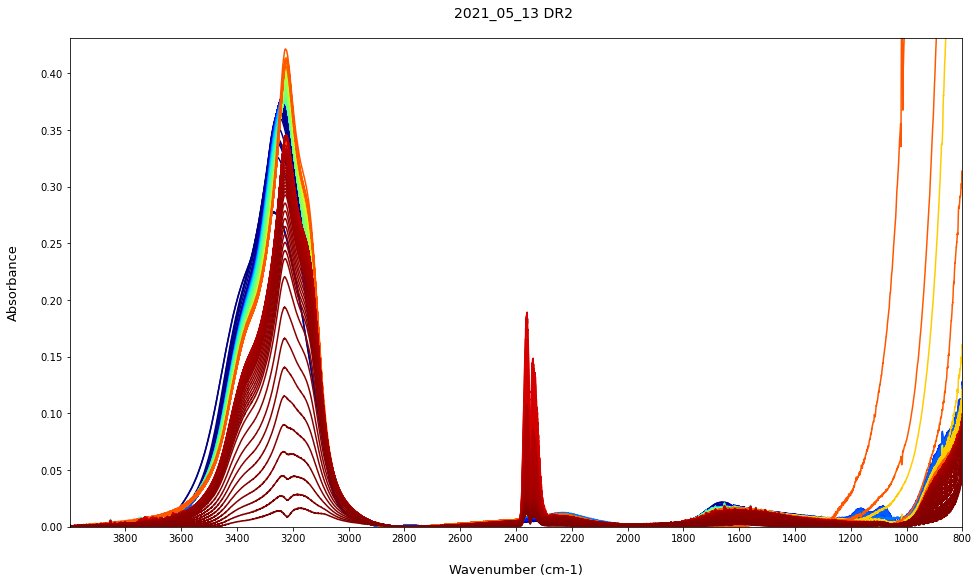

848


In [1621]:
nscan = len(list(All_data_BC.columns.values.tolist()))


fig= plt.figure(figsize=(16,9))


i=1



for i in range(1,nscan):
    
    #Temp =   T_ramp_df.iloc[i:,14].astype(float).max()
    
    plt.plot(All_data_BC.Wavenumber, All_data_BC['ASW_{}_{}'.format(date, i)], c=cm.jet(i/nscan), label=f"{i}")
    
    i=+1
    

plt.title('{0} DR2 '.format(date), pad=20).set_fontsize(14)
plt.xlabel('Wavenumber (cm-1)',labelpad=20).set_fontsize(13)
plt.ylabel('Absorbance',labelpad=20).set_fontsize(13)
plt.axis([4000,800,0,ymax2])
ax = fig.gca()
ax.set_xticks(numpy.arange(800,4000,200))
#ax.mplplot.grid()
#plt.legend()


#plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR2\DR2_{0}_Data1_BC.png'.format(date))

plt.show()


print(nscan)

###  2.4.A Oh stretch

#### 2.4.A.1 Baseline correction

Insert in legend parameters of BC from data_annex

In [1622]:
nscan = len(list(dataA_BC.columns.values.tolist()))

nscan2 = nscan//int(2)
nscan1 = nscan2*int(5)

figure, panels = plt.subplots(figsize=(12, nscan1), ncols=2, nrows=nscan2)

for panel, column in zip(panels.flatten(), dataA_BC.columns[1:]):
    panel.plot(dataA_BC.Wavenumber, dataA_BC[column], label="data")
    panel.plot(dataA_BC.Wavenumber, backgroundsA[column], ls="dashed",  label="bg")

    panel.plot(dataA_BC.Wavenumber, dataA_BC[column]+ backgroundsA[column], ls="dotted",  label="data+bg (RAW)")

    
    
    #panel.legend()
    panel.set_xlabel("wavenumber")
    panel.invert_xaxis()
    panel.set_title(column)
    panel.legend()
    
    plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR\DR2_{0}_BCA.png'.format(date))

    
plt.show()
    
    
#plt.tight_layout()
    

ValueError: Image size of 864x152640 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 864x152640 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 864x152640 with 848 Axes>

#### 2.4.A.3 All scans

Idea for later : plot OH and maxA together

[Marker modification](https://matplotlib.org/stable/api/markers_api.html)

<ipython-input-1628-d144ba1be4ee>:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()  # otherwise the right y-label is slightly clipped


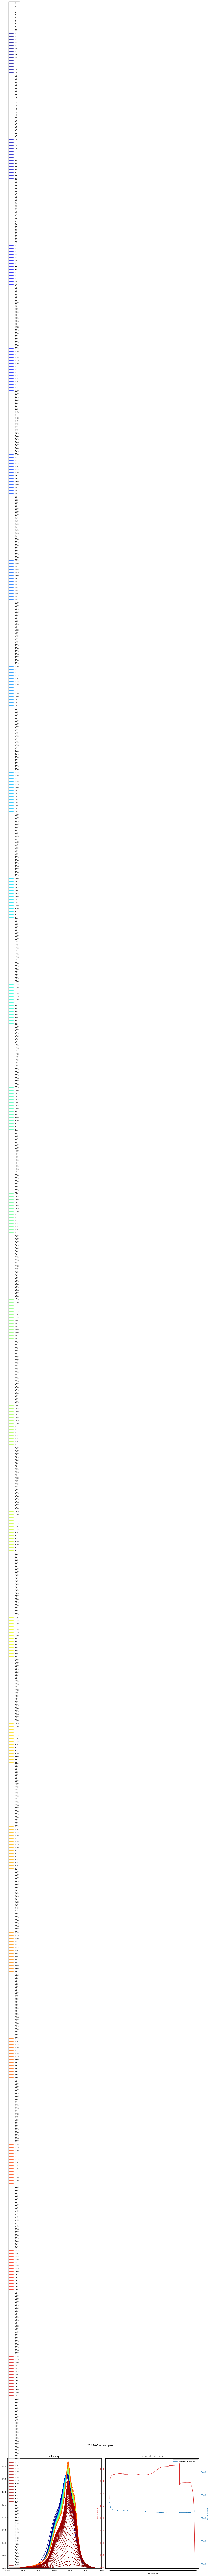

In [1628]:
gs = gridspec.GridSpec(8, 16,hspace=0.8,wspace=0.5)

fig = plt.figure(figsize=(17,10))

fig.suptitle('20K 10-7 All samples')

ax1 = fig.add_subplot(gs[:, 0:8]) # row 0, col 0
    
for i in range(1,nscan):
    
    #Temp =   T_ramp_df.iloc[i:,14].astype(float).max()
    
    ax1.plot(dataA_BC.Wavenumber, dataA_BC['{}_{}_{}'.format(spl, date, i)], c=cm.jet(i/nscan), label=f"{i}")
    
    i=+1
    


ax1.set_title('Full range')
ax1.axis([4000, 2800, 0, ymax2])

plt.legend()

ax2 = fig.add_subplot(gs[:, 8:16]) # row 0, col 0


color = 'tab:red'
ax2.set_xlabel('scan number')
ax2.set_ylabel('Absorbance', color=color)
ax2.plot(data_anex_df['scan_number'], data_anex_df['maxA'], color=color, label='Max Absorbance')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticks(numpy.arange(0,nscan,1))

ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax3.set_ylabel('wavenumber', color=color)  # we already handled the x-label with ax1
ax3.plot(data_anex_df['scan_number'], data_anex_df['maxAw'], color=color, label='Wavenumber shift')
ax3.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend()


ax3.set_title('Normalized zoom')
ax3.margins(2, 2)     
#ax3.axis([3340, 3210, 0.27, 0.306])

plt.show()

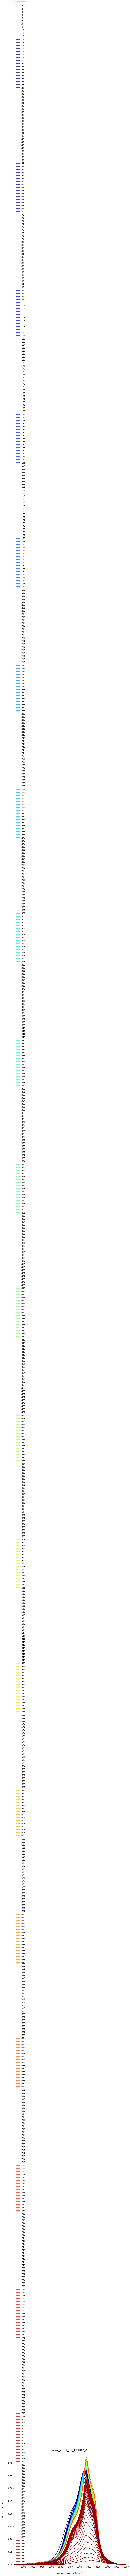

848


In [1629]:
T_ramp_df


fig= plt.figure(figsize=(10,10))


i=1


for i in range(1,nscan):
    
    
    
    #Temp =   T_ramp_df.iloc[i:,14].astype(float).max()
    
    plt.plot(dataA_BC.Wavenumber, dataA_BC['{}_{}_{}'.format(spl, date, i)], c=cm.jet(i/nscan), label=f"{i}")
    
    i=+1
    

plt.title('{}_{} DR2_A '.format(spl, date), pad=20).set_fontsize(14)
plt.xlabel('Wavenumber (cm-1)',labelpad=20).set_fontsize(13)
plt.ylabel('Absorbance',labelpad=20).set_fontsize(13)
plt.axis([4000,2800,0,ymax2])
ax = fig.gca()
ax.set_xticks(numpy.arange(2800,4000,100))
#ax.mplplot.grid()
plt.legend()


plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR\DR2_{0}_A.png'.format(date))

plt.show()


print(nscan)

#### 2.4.A.4 Max Absorbance

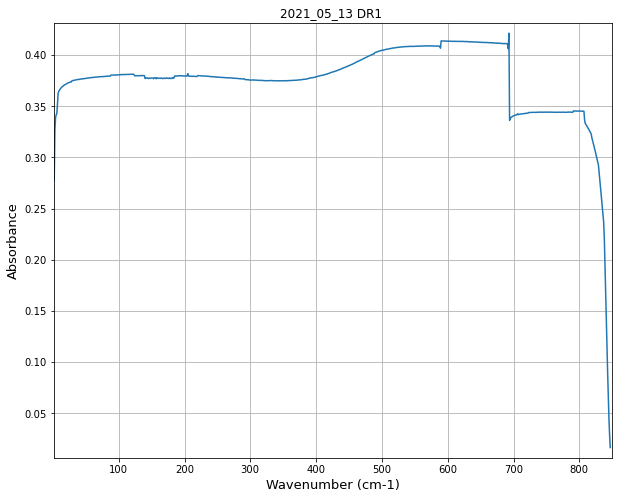

In [1630]:
fig= plt.figure(figsize=(10,8))


plt.plot(data_anex_df['scan_number'], data_anex_df['maxA'])

    

plt.title('{0} DR1 '.format(date))
plt.axis([1,nscan+1,ymin2,ymax2])
plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
plt.grid()
#plt.legend()


#plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR1\DR1_{0}_All_scans.png'.format(date))

plt.show()

#### 2.4.A.5 Max A + Redshift

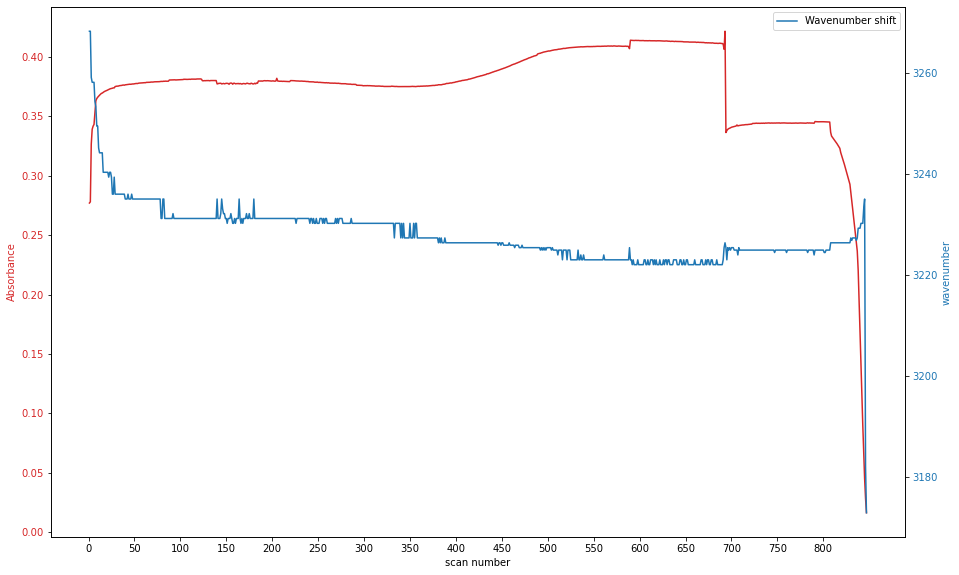

In [1674]:

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('scan number')
ax1.set_ylabel('Absorbance', color=color)
ax1.plot(data_anex_df['scan_number'], data_anex_df['maxA'], color=color, label='Max Absorbance')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(numpy.arange(0,nscan,50))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('wavenumber', color=color)  # we already handled the x-label with ax1
ax2.plot(data_anex_df['scan_number'], data_anex_df['maxAw'], color=color, label='Wavenumber shift')
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(16, 9)
plt.legend()
plt.show()

###  2.4.B Comb Bands

#### 2.4.B.1 Baseline correction

In [1632]:
nscan = len(list(dataB_BC.columns.values.tolist()))

nscan2 = nscan//int(2)
nscan1 = nscan2*int(5)

figure, panels = plt.subplots(figsize=(10, nscan1), ncols=2, nrows=nscan2)

for panel, column in zip(panels.flatten(), dataB_BC.columns[1:]):
    panel.plot(dataB_BC.Wavenumber, dataB_BC[column], label="data")
    panel.plot(dataB_BC.Wavenumber, backgroundsB[column], ls="dashed",  label="bg")

    panel.plot(dataB_BC.Wavenumber, dataB_BC[column] + backgroundsB[column], ls="dotted",  label="data+bg (RAW)")

    
    
    #panel.legend()
    panel.set_xlabel("wavenumber")
    panel.set_title(column)
    panel.invert_xaxis()
    panel.legend()
    
    plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR\DR2_{0}_BCB.png'.format(date))

    
plt.show()
    
    
#plt.tight_layout()
    

ValueError: Image size of 720x152640 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 720x152640 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x152640 with 848 Axes>

#### 2.4.B.2 Backgrounds

#### 2.4.B.3 All scans

In [1633]:
nscan = len(list(dataA_BC.columns.values.tolist()))

ymax =   data_anex_df.iloc[1:,20].astype(float).max()
ymin =   data_anex_df.iloc[1:,20].astype(float).min()
ymax2 = ymax + 0.005
ymin2 = ymin - 0.01 

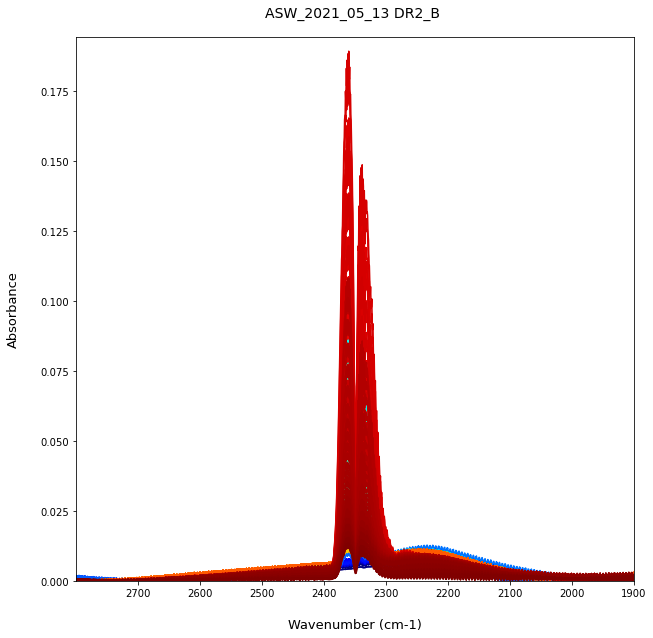

848


In [1634]:
fig= plt.figure(figsize=(10,10))


i=1

for i in range(1,nscan):
    
    #Temp =   T_ramp_df.iloc[i:,14].astype(float).max()
    
    plt.plot(dataB_BC.Wavenumber, dataB_BC['{}_{}_{}'.format(spl, date, i)], c=cm.jet(i/nscan), label=f"{i}")
    
    i=+1
    

plt.title('{}_{} DR2_B '.format(spl, date), pad=20).set_fontsize(14)
plt.xlabel('Wavenumber (cm-1)',labelpad=20).set_fontsize(13)
plt.ylabel('Absorbance',labelpad=20).set_fontsize(13)
plt.axis([2800,1900,0,ymax2])
ax = fig.gca()
ax.set_xticks(numpy.arange(1900,2800,100))
#ax.mplplot.grid()
#plt.legend()


#plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR\DR2_{0}_A.png'.format(date))

plt.show()


print(nscan)

#### 2.4.B.4 Max A + Redshift

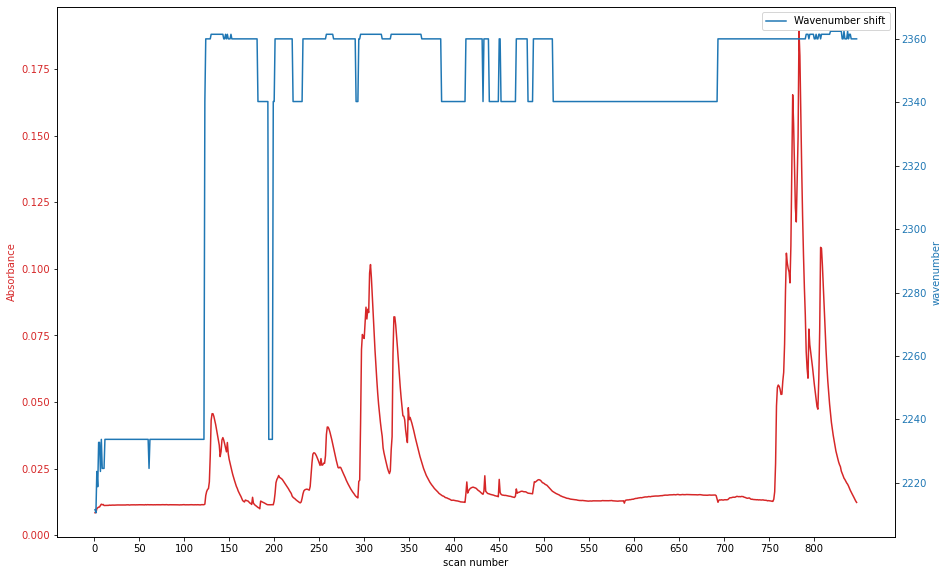

In [1673]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('scan number')
ax1.set_ylabel('Absorbance', color=color)
ax1.plot(data_anex_df['scan_number'], data_anex_df['maxB'], color=color, label='Max Absorbance')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(numpy.arange(0,nscan,50))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('wavenumber', color=color)  # we already handled the x-label with ax1
ax2.plot(data_anex_df['scan_number'], data_anex_df['maxBw'], color=color, label='Wavenumber shift')
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(16, 9)
plt.legend()
plt.show()

###  2.4.C Bending

#### 2.4.B.1 Baseline correction

In [1636]:
nscan = len(list(dataC_BC.columns.values.tolist()))

nscan2 = nscan//int(2)
nscan1 = nscan2*int(5)

figure, panels = plt.subplots(figsize=(12, nscan1), ncols=2, nrows=nscan2)

for panel, column in zip(panels.flatten(), dataC_BC.columns[1:]):
    panel.plot(dataC_BC.Wavenumber, dataC_BC[column], label="data")
    panel.plot(dataC_BC.Wavenumber, backgroundsC[column], ls="dashed",  label="bg")

    panel.plot(dataC_BC.Wavenumber, dataC_BC[column]+ backgroundsC[column], ls="dotted",  label="data+bg")

    
    
    #panel.legend()
    panel.set_xlabel("wavenumber")
    panel.invert_xaxis()
    panel.set_title(column)
    panel.legend()
    
    plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR\DR2_{0}_BCC.png'.format(date))

    
plt.show()
    
    
#plt.tight_layout()
    

ValueError: Image size of 864x152640 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 864x152640 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 864x152640 with 848 Axes>

#### 2.4.B.2 Backgrounds

#### 2.4.B.3 All scans

In [1637]:
nscan = len(list(dataC_BC.columns.values.tolist()))

ymax =   data_anex_df.iloc[1:,23].astype(float).max()
ymin =   data_anex_df.iloc[1:,23].astype(float).min()
ymax2 = ymax + 0.005
ymin2 = ymin - 0.01 

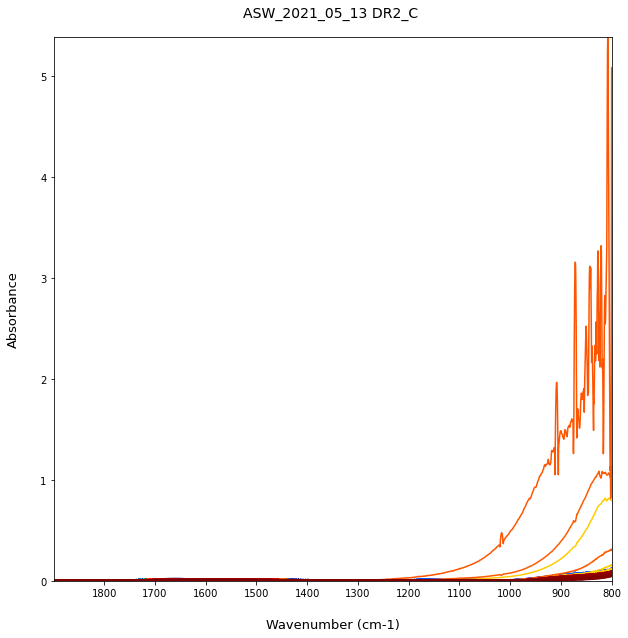

In [1638]:
fig= plt.figure(figsize=(10,10))


i=1

for i in range(1,nscan):
    
    #Temp =   T_ramp_df.iloc[i:,14].astype(float).max()
    
    plt.plot(dataC_BC.Wavenumber, dataC_BC['{}_{}_{}'.format(spl, date, i)], c=cm.jet(i/nscan), label=f"{i}")
    
    i=+1
    

plt.title('{}_{} DR2_C '.format(spl, date), pad=20).set_fontsize(14)
plt.xlabel('Wavenumber (cm-1)',labelpad=20).set_fontsize(13)
plt.ylabel('Absorbance',labelpad=20).set_fontsize(13)
plt.axis([1900,800,0,ymax2])
ax = fig.gca()
ax.set_xticks(numpy.arange(800,1900,100))
#ax.mplplot.grid()
#plt.legend()


#plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR\DR2_{0}_A.png'.format(date))

plt.show()


#### 2.4.B.4 Max A + Redshift

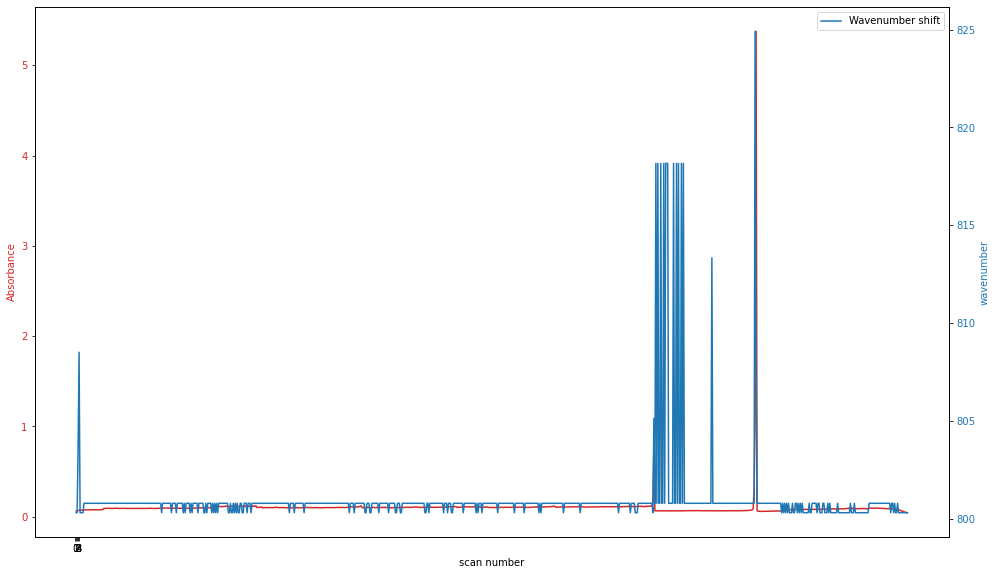

In [1639]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('scan number')
ax1.set_ylabel('Absorbance', color=color)
ax1.plot(data_anex_df['scan_number'], data_anex_df['maxC'], color=color, label='Max Absorbance')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(numpy.arange(0,5,1))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('wavenumber', color=color)  # we already handled the x-label with ax1
ax2.plot(data_anex_df['scan_number'], data_anex_df['maxCw'], color=color, label='Wavenumber shift')
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(16, 9)
plt.legend()
plt.show()

# <span style='background :yellow' > $\color{green}{\text{DR3 : Normalisation}}$ </span>

## 3.1 Integration 

In the following we are going to integrate the spectra between two borns with the trapezoidal integration technique

In [1640]:
# this function computes the inegral of the scan of index index, between borns 1 and 2 (in cm-1)

def integration(index, data, wavelength, born_1, born_2):

    nwl = len(wavelength) #number of wavelenght - spectra resolution

    list_names =  list(data.columns.values.tolist())
    
    scan_place = 0
    
    for i in range(len(list_names)):
        
        name_corr = list_names[i].split('_')
        
        if int(name_corr[-1]) == index:
    
            scan_place = i
    
    scan = data.T.iloc[scan_place]
        
    index_born_1 = 0
    index_born_2 = 0
    
    for iwl in range(nwl):
        
        if abs(wavelength[iwl] - born_1) < 0.5:
            
            index_born_1 = iwl
    
        elif abs(wavelength[iwl] - born_2) < 0.5:
            
            index_born_2 = iwl
    
    area = 0
    
    for iint in range(index_born_1, index_born_2):
        
        d_area = 0.5*(scan[iint]+scan[iint+1])*(wavelength[iint+1]-wavelength[iint])
    
        area = area + d_area
        
    return area

### 3.1.A Oh stretch

In [1641]:
wavelengthA = dataA_BC.T.iloc[0]
wavelengthA = wavelengthA.reset_index(drop=True)

In [1642]:
wavelengthA

0       2800.178
1       2800.660
2       2801.142
3       2801.624
4       2802.106
          ...   
2485    3998.257
2486    3998.739
2487    3999.221
2488    3999.703
2489    4000.185
Name: Wavenumber, Length: 2490, dtype: float64

In [1643]:
dataA_BC_I = dataA_BC.T.iloc[1:].T
dataA_BC_I = dataA_BC_I.reset_index(drop=True)

In [1644]:
dataA_BC_I

ASW_2021_05_13_1  ASW_2021_05_13_2  ASW_2021_05_13_3  ASW_2021_05_13_4  \
0         2.762011e-05         -0.000215          0.000203      2.343479e-04   
1         1.295855e-05         -0.000226          0.000212      2.439467e-04   
2        -8.673617e-19         -0.000228          0.000025      6.661646e-05   
3         3.979145e-05         -0.000179          0.000101      1.163832e-04   
4         6.790689e-05         -0.000150          0.000000     -1.517883e-18   
...                ...               ...               ...               ...   
2485      1.102582e-04          0.000106          0.000186      3.244365e-04   
2486      1.431737e-04          0.000140          0.000092      1.609282e-04   
2487      1.574191e-04          0.000168          0.000000      0.000000e+00   
2488      4.102455e-05          0.000091          0.000377      7.211818e-04   
2489      0.000000e+00          0.000077          0.000872      1.604154e-03   

      ASW_2021_05_13_5  ASW_2021_05_13_6  ASW_2021_05_13_7  ASW_2021_05_13_8  \
0         2.354822e-04      2.663169e-04          0.000126          0.000141   
1         2.396046e-04      2.718734e-04          0.000127          0.000107   
2         6.644108e-05      8.970293e-05          0.000002          0.000039   
3         1.173295e-04      1.268895e-04          0.000063          0.000022   
4         2.168404e-19     -6.505213e-19          0.000000         -0.000033   
...                ...               ...               ...               ...   
2485      3.510691e-04      3.818229e-04          0.000182          0.000357   
2486      1.766795e-04      2.161515e-04          0.000109          0.000188   
2487      0.000000e+00      0.000000e+00          0.000000          0.000000   
2488      6.771105e-04      7.214585e-04          0.000032          0.000606   
2489      1.533111e-03      1.636628e-03          0.000242          0.001470   

      ASW_2021_05_13_9  ASW_2021_05_13_10  ...  ASW_2021_05_13_838  \
0             0.000189           0.000186  ...        2.735218e-05   
1             0.000143           0.000152  ...        1.339446e-04   
2             0.000073           0.000093  ...       -8.673617e-19   
3             0.000047           0.000059  ...        1.469734e-04   
4             0.000000           0.000000  ...        4.377782e-05   
...                ...                ...  ...                 ...   
2485          0.000365           0.000393  ...        4.667534e-04   
2486          0.000185           0.000182  ...        4.587935e-04   
2487          0.000000           0.000000  ...        5.148134e-04   
2488          0.000532           0.000501  ...        1.132756e-04   
2489          0.001336           0.001301  ...       -6.505213e-19   

      ASW_2021_05_13_839  ASW_2021_05_13_840  ASW_2021_05_13_841  \
0          -8.673617e-19        0.000000e+00            0.000000   
1           1.267519e-04        1.301570e-04            0.000136   
2           5.271728e-06        5.195905e-06            0.000007   
3           1.894746e-04        1.873209e-04            0.000178   
4           7.991346e-05        8.376481e-05            0.000060   
...                  ...                 ...                 ...   
2485        9.017384e-04        8.647472e-04            0.000826   
2486        8.330263e-04        8.200961e-04            0.000788   
2487        8.904892e-04        9.266531e-04            0.000876   
2488        2.849736e-04        3.152660e-04            0.000285   
2489        4.336809e-19       -4.336809e-19            0.000000   

      ASW_2021_05_13_842  ASW_2021_05_13_843  ASW_2021_05_13_844  \
0               0.000000        0.000000e+00            0.000004   
1               0.000138        1.519298e-04            0.000136   
2               0.000021        3.061965e-05            0.000000   
3               0.000205        2.144695e-04            0.000171   
4               0.000098        1.039393e-04            0.000057   
...               

In [1645]:
nscan = len(list(dataA_BC_I.columns.values.tolist()))

areas = numpy.zeros(nscan)
areasBCA = numpy.zeros(nscan)

times = numpy.zeros(nscan)

for iint in range(0, nscan):
    
    #areas[iint] = integration(iint+1, data, wavelength, 2900, 3900)
    areasBCA[iint] = integration(iint+1, dataA_BC_I, wavelengthA, 2800, 4000)
    #times[iint] = 15*iint
    

In [1646]:
areasBCA

array([ 90.04664752,  90.11421407,  94.95229522,  96.24096689,
        96.52381334,  96.72127961,  97.46603266,  98.9593172 ,
        99.25241785,  99.46152938,  99.64104881,  99.78596425,
        99.91305721, 100.09992031, 100.10445178, 100.15524581,
       100.2914137 , 100.33083449, 100.31227034, 100.42377895,
       100.50318048, 100.58987524, 100.60875081, 100.67539095,
       100.67881979, 100.63837742, 100.7582988 , 100.71138556,
       100.97938065, 100.93833903, 100.97118077, 100.92631167,
       101.03709219, 101.07252813, 101.06020994, 101.0841008 ,
       101.06447583, 101.04155098, 101.04212282, 101.12358177,
       101.14114987, 101.15911346, 101.17254011, 101.18402092,
       101.14702357, 101.07290183, 101.16817054, 101.18282501,
       101.13107167, 101.2014899 , 101.22182798, 101.22633808,
       101.1979527 , 101.16669499, 101.28417138, 101.2626283 ,
       101.24795659, 101.24356503, 101.3029152 , 101.32594312,
       101.27727912, 101.31560299, 101.34101032, 101.36

In [1647]:
areasBCA_df = pd.DataFrame({ 'File number': dataA_BC_I.iloc[0,:], 'Int_A': areasBCA[:]})
areasBCA_df = areasBCA_df.T.iloc[1:].T

areasBCA_df = areasBCA_df.reset_index()
areasBCA_df['Name'] = areasBCA_df['index']
areasBCA_df= areasBCA_df.T.iloc[1:].T

In [1648]:
areasBCA_df

Int_A                Name
0    90.0466    ASW_2021_05_13_1
1    90.1142    ASW_2021_05_13_2
2    94.9523    ASW_2021_05_13_3
3     96.241    ASW_2021_05_13_4
4    96.5238    ASW_2021_05_13_5
..       ...                 ...
842  23.7258  ASW_2021_05_13_843
843  17.8893  ASW_2021_05_13_844
844  12.5989  ASW_2021_05_13_845
845  8.09079  ASW_2021_05_13_846
846   4.5032  ASW_2021_05_13_847

[847 rows x 2 columns]

### Append to data Annex

In [1649]:
#data_anex_df

In [1650]:
data_anex_df = pd.merge(data_anex_df, areasBCA_df, on="Name")

In [1651]:
data_anex_df

Name      min1  index1      min2  index2      min3  index3  \
0      ASW_2021_05_13_1 -0.014722    6638 -0.004114    4151 -0.004143    4140   
1      ASW_2021_05_13_2 -0.013557    6630 -0.003223    4209 -0.003271    4140   
2      ASW_2021_05_13_3 -0.012140    6636 -0.002166    4153 -0.002128    4134   
3      ASW_2021_05_13_4 -0.011840    6636 -0.001680    4153 -0.001689    4134   
4      ASW_2021_05_13_5 -0.011791    6636 -0.001560    4153 -0.001565    4134   
..                  ...       ...     ...       ...     ...       ...     ...   
842  ASW_2021_05_13_843  0.007231    6638  0.010093    4149  0.009504    3951   
843  ASW_2021_05_13_844  0.008622    6638  0.010998    4151  0.010368    3951   
844  ASW_2021_05_13_845  0.009758    6638  0.011605    4151  0.010888    3942   
845  ASW_2021_05_13_846  0.010426    6638  0.011803    4149  0.011117    3961   
846  ASW_2021_05_13_847  0.011142    6638  0.011994    4149  0.011298    3942   

         min4  index4      min5  ...       maxA     maxAw  scan_number  maxBi  \
0    0.002053    2392  0.002395  ...   0.277013  3268.321            1   2928   
1    0.002862    2392  0.003149  ...   0.278015  3268.321            2   2926   
2    0.003635    2390  0.003998  ...   0.326622  3259.160            3   2953   
3    0.004012    2447  0.004475  ...   0.339073  3258.196            4   2943   
4    0.004190    2388  0.004680  ...   0.341674  3258.196            5   2972   
..        ...     ...       ...  ...        ...       ...          ...    ...   
842  0.008941    2286  0.008657  ...  0.0901729  3230.233          843   3236   
843  0.009187    2286  0.008756  ...  0.0663604  3233.125          844   3236   
844  0.009167    2286  0.008658  ...  0.0450714  3235.054          845   3236   
845  0.009026    2286  0.008403  ...  0.0285922  3182.021          846   3236   
846  0.008909    2286  0.008190  ...   0.016449  3172.860          847   3236   

           maxB     maxBw maxCi       maxC     maxCw    Int_A  
0    0.00840258  2211.504     1   0.061762  800.3264  90.0466  
1    0.00843111  2210.540     1  0.0626923  800.3264  90.1142  
2     0.0099036  2223.557     8  0.0696012  803.7012  94.9523  
3     0.0102622  2218.736    18  0.0718899  808.5225   96.241  
4     0.0105079  2232.718     1  0.0735246  800.3264  96.5238  
..          ...       ...   ...        ...       ...      ...  
842   0.0148466  2359.999     1  0.0562618  800.3264  23.7258  
843   0.0141678  2359.999     1  0.0536319  800.3264  17.8893  
844    0.013449  2359.999     1  0.0494834  800.3264  12.5989  
845   0.0128023  2359.999     1  0.0479061  800.3264  8.09079  
846   0.0122766  2359.999     1  0.0445853  800.3264   4.5032  

[847 rows x 26 columns]

## Plotting

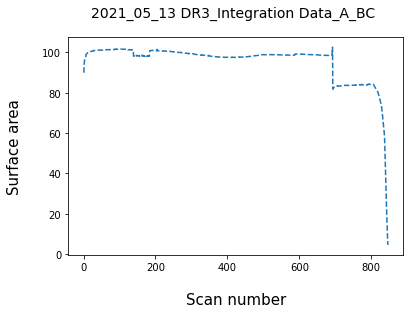

In [1652]:
fig= plt.figure(figsize=(6,4))

plt.plot(range(nscan), areasBCA, '--')

plt.title('{0} DR3_Integration Data_A_BC '.format(date), pad=20).set_fontsize(14)
plt.xlabel('Scan number',labelpad=20).set_fontsize(15)
plt.ylabel('Surface area',labelpad=20).set_fontsize(15)

#plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR3\DR3_{0}_Int1.png'.format(date))

plt.show()

### 3.1.A.2 Ethane peaks integration

Integration of ethane peaks:

create if statement spl = C2H6, C2H6_ASW ...

Integrate over specified range (?)

Do I need another baseline correction to make the ethane peak region flat ? To check

## 3.2 Normalisation 

2 different normalisations
- The 20K sample can be normalised with the first scan (ie the deposition)
- The sample deposited at the higher T needs to be with normalised with respect to the Integration from the normalized scan (3.3?)  

### 20K depositions

Insert if statement: if TRamp[:3] not Nan continue otherwise don`t perform normalisation

In [1653]:
Dep_val = data_anex_df['Int_A'].values[0]

In [1654]:
Dep_val

90.04664752461284

In [1655]:
NormFactor = 100 / Dep_val

In [1656]:
NormFactor

1.1105355140808164

In [1657]:
dataA_N = dataA_BC_I * NormFactor


Saanity Check:
    
- Insert wavenumber (before export)

In [1658]:




dataA_N.insert(loc = 0,
          column = 'Wavenumber',
          value =  wavelengthA)

dataA_N

Wavenumber  ASW_2021_05_13_1  ASW_2021_05_13_2  ASW_2021_05_13_3  \
0       2800.178      3.067311e-05         -0.000239          0.000226   
1       2800.660      1.439094e-05         -0.000251          0.000235   
2       2801.142     -9.632360e-19         -0.000253          0.000027   
3       2801.624      4.418981e-05         -0.000199          0.000112   
4       2802.106      7.541301e-05         -0.000166          0.000000   
...          ...               ...               ...               ...   
2485    3998.257      1.224457e-04          0.000118          0.000207   
2486    3998.739      1.589994e-04          0.000156          0.000102   
2487    3999.221      1.748195e-04          0.000187          0.000000   
2488    3999.703      4.555923e-05          0.000101          0.000418   
2489    4000.185      0.000000e+00          0.000086          0.000968   

      ASW_2021_05_13_4  ASW_2021_05_13_5  ASW_2021_05_13_6  ASW_2021_05_13_7  \
0         2.602517e-04      2.615113e-04      2.957543e-04          0.000140   
1         2.709115e-04      2.660894e-04      3.019251e-04          0.000141   
2         7.397994e-05      7.378517e-05      9.961828e-05          0.000002   
3         1.292477e-04      1.302986e-04      1.409153e-04          0.000070   
4        -1.685663e-18      2.408090e-19     -7.224270e-19          0.000000   
...                ...               ...               ...               ...   
2485      3.602982e-04      3.898747e-04      4.240279e-04          0.000202   
2486      1.787165e-04      1.962089e-04      2.400439e-04          0.000121   
2487      0.000000e+00      0.000000e+00      0.000000e+00          0.000000   
2488      8.008980e-04      7.519552e-04      8.012053e-04          0.000035   
2489      1.781469e-03      1.702574e-03      1.817534e-03          0.000269   

      ASW_2021_05_13_8  ASW_2021_05_13_9  ...  ASW_2021_05_13_838  \
0             0.000156          0.000210  ...        3.037557e-05   
1             0.000119          0.000159  ...        1.487502e-04   
2             0.000043          0.000081  ...       -9.632360e-19   
3             0.000024          0.000052  ...        1.632192e-04   
4            -0.000037          0.000000  ...        4.861682e-05   
...                ...               ...  ...                 ...   
2485          0.000396          0.000405  ...        5.183462e-04   
2486          0.000209          0.000205  ...        5.095064e-04   
2487          0.000000          0.000000  ...        5.717185e-04   
2488          0.000673          0.000591  ...        1.257966e-04   
2489          0.001632          0.001483  ...       -7.224270e-19   

      ASW_2021_05_13_839  ASW_2021_05_13_840  ASW_2021_05_13_841  \
0          -9.632360e-19        0.000000e+00            0.000000   
1           1.407624e-04        1.445439e-04            0.000151   
2           5.854441e-06        5.770237e-06            0.000008   
3           2.104183e-04        2.080265e-04            0.000198   
4           8.874673e-05        9.302380e-05            0.000066   
...                  ...                 ...                 ...   
2485        1.001413e-03        9.603325e-04            0.000917   
2486        9.251053e-04        9.107459e-04            0.000875   
2487        9.889199e-04        1.029081e-03            0.000972   
2488        3.164733e-04        3.501141e-04            0.000316   
2489        4.816180e-19       -4.816180e-19            0.000000   

      ASW_2021_05_13_842  ASW_2021_05_13_843  ASW_2021_05_13_844  \
0               0.000000        0.000000e+00            0.000005   
1               0.000153        1.687235e-04            0.000151   
2               0.000023        3.400420e-05            0.000000   
3               0.000228        2.381760e-04            0.000190   
4               0.000109        1.154283e-04            0.000064   
...                  ...                 ...                 ...   
2485            0.000849        8.

## Export as csv

In [1659]:
dataA_N.to_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Data\DR\DR3_{0}_A.csv'.format(date))

## 3.3 Integration II 

Purpose here is to integrate the normalised scan so we can have integration value for scans at higher temperature to use as normalisation value for scans deposited at higherrt temperature

Supress wavenumber

In [1660]:
dataA_N

Wavenumber  ASW_2021_05_13_1  ASW_2021_05_13_2  ASW_2021_05_13_3  \
0       2800.178      3.067311e-05         -0.000239          0.000226   
1       2800.660      1.439094e-05         -0.000251          0.000235   
2       2801.142     -9.632360e-19         -0.000253          0.000027   
3       2801.624      4.418981e-05         -0.000199          0.000112   
4       2802.106      7.541301e-05         -0.000166          0.000000   
...          ...               ...               ...               ...   
2485    3998.257      1.224457e-04          0.000118          0.000207   
2486    3998.739      1.589994e-04          0.000156          0.000102   
2487    3999.221      1.748195e-04          0.000187          0.000000   
2488    3999.703      4.555923e-05          0.000101          0.000418   
2489    4000.185      0.000000e+00          0.000086          0.000968   

      ASW_2021_05_13_4  ASW_2021_05_13_5  ASW_2021_05_13_6  ASW_2021_05_13_7  \
0         2.602517e-04      2.615113e-04      2.957543e-04          0.000140   
1         2.709115e-04      2.660894e-04      3.019251e-04          0.000141   
2         7.397994e-05      7.378517e-05      9.961828e-05          0.000002   
3         1.292477e-04      1.302986e-04      1.409153e-04          0.000070   
4        -1.685663e-18      2.408090e-19     -7.224270e-19          0.000000   
...                ...               ...               ...               ...   
2485      3.602982e-04      3.898747e-04      4.240279e-04          0.000202   
2486      1.787165e-04      1.962089e-04      2.400439e-04          0.000121   
2487      0.000000e+00      0.000000e+00      0.000000e+00          0.000000   
2488      8.008980e-04      7.519552e-04      8.012053e-04          0.000035   
2489      1.781469e-03      1.702574e-03      1.817534e-03          0.000269   

      ASW_2021_05_13_8  ASW_2021_05_13_9  ...  ASW_2021_05_13_838  \
0             0.000156          0.000210  ...        3.037557e-05   
1             0.000119          0.000159  ...        1.487502e-04   
2             0.000043          0.000081  ...       -9.632360e-19   
3             0.000024          0.000052  ...        1.632192e-04   
4            -0.000037          0.000000  ...        4.861682e-05   
...                ...               ...  ...                 ...   
2485          0.000396          0.000405  ...        5.183462e-04   
2486          0.000209          0.000205  ...        5.095064e-04   
2487          0.000000          0.000000  ...        5.717185e-04   
2488          0.000673          0.000591  ...        1.257966e-04   
2489          0.001632          0.001483  ...       -7.224270e-19   

      ASW_2021_05_13_839  ASW_2021_05_13_840  ASW_2021_05_13_841  \
0          -9.632360e-19        0.000000e+00            0.000000   
1           1.407624e-04        1.445439e-04            0.000151   
2           5.854441e-06        5.770237e-06            0.000008   
3           2.104183e-04        2.080265e-04            0.000198   
4           8.874673e-05        9.302380e-05            0.000066   
...                  ...                 ...                 ...   
2485        1.001413e-03        9.603325e-04            0.000917   
2486        9.251053e-04        9.107459e-04            0.000875   
2487        9.889199e-04        1.029081e-03            0.000972   
2488        3.164733e-04        3.501141e-04            0.000316   
2489        4.816180e-19       -4.816180e-19            0.000000   

      ASW_2021_05_13_842  ASW_2021_05_13_843  ASW_2021_05_13_844  \
0               0.000000        0.000000e+00            0.000005   
1               0.000153        1.687235e-04            0.000151   
2               0.000023        3.400420e-05            0.000000   
3               0.000228        2.381760e-04            0.000190   
4               0.000109        1.154283e-04            0.000064   
...                  ...                 ...                 ...   
2485            0.000849        8.

In [1661]:
dataA_N = dataA_N.T.iloc[1:].T

In [1662]:
dataA_N

ASW_2021_05_13_1  ASW_2021_05_13_2  ASW_2021_05_13_3  ASW_2021_05_13_4  \
0         3.067311e-05         -0.000239          0.000226      2.602517e-04   
1         1.439094e-05         -0.000251          0.000235      2.709115e-04   
2        -9.632360e-19         -0.000253          0.000027      7.397994e-05   
3         4.418981e-05         -0.000199          0.000112      1.292477e-04   
4         7.541301e-05         -0.000166          0.000000     -1.685663e-18   
...                ...               ...               ...               ...   
2485      1.224457e-04          0.000118          0.000207      3.602982e-04   
2486      1.589994e-04          0.000156          0.000102      1.787165e-04   
2487      1.748195e-04          0.000187          0.000000      0.000000e+00   
2488      4.555923e-05          0.000101          0.000418      8.008980e-04   
2489      0.000000e+00          0.000086          0.000968      1.781469e-03   

      ASW_2021_05_13_5  ASW_2021_05_13_6  ASW_2021_05_13_7  ASW_2021_05_13_8  \
0         2.615113e-04      2.957543e-04          0.000140          0.000156   
1         2.660894e-04      3.019251e-04          0.000141          0.000119   
2         7.378517e-05      9.961828e-05          0.000002          0.000043   
3         1.302986e-04      1.409153e-04          0.000070          0.000024   
4         2.408090e-19     -7.224270e-19          0.000000         -0.000037   
...                ...               ...               ...               ...   
2485      3.898747e-04      4.240279e-04          0.000202          0.000396   
2486      1.962089e-04      2.400439e-04          0.000121          0.000209   
2487      0.000000e+00      0.000000e+00          0.000000          0.000000   
2488      7.519552e-04      8.012053e-04          0.000035          0.000673   
2489      1.702574e-03      1.817534e-03          0.000269          0.001632   

      ASW_2021_05_13_9  ASW_2021_05_13_10  ...  ASW_2021_05_13_838  \
0             0.000210           0.000206  ...        3.037557e-05   
1             0.000159           0.000169  ...        1.487502e-04   
2             0.000081           0.000103  ...       -9.632360e-19   
3             0.000052           0.000066  ...        1.632192e-04   
4             0.000000           0.000000  ...        4.861682e-05   
...                ...                ...  ...                 ...   
2485          0.000405           0.000436  ...        5.183462e-04   
2486          0.000205           0.000202  ...        5.095064e-04   
2487          0.000000           0.000000  ...        5.717185e-04   
2488          0.000591           0.000557  ...        1.257966e-04   
2489          0.001483           0.001445  ...       -7.224270e-19   

      ASW_2021_05_13_839  ASW_2021_05_13_840  ASW_2021_05_13_841  \
0          -9.632360e-19        0.000000e+00            0.000000   
1           1.407624e-04        1.445439e-04            0.000151   
2           5.854441e-06        5.770237e-06            0.000008   
3           2.104183e-04        2.080265e-04            0.000198   
4           8.874673e-05        9.302380e-05            0.000066   
...                  ...                 ...                 ...   
2485        1.001413e-03        9.603325e-04            0.000917   
2486        9.251053e-04        9.107459e-04            0.000875   
2487        9.889199e-04        1.029081e-03            0.000972   
2488        3.164733e-04        3.501141e-04            0.000316   
2489        4.816180e-19       -4.816180e-19            0.000000   

      ASW_2021_05_13_842  ASW_2021_05_13_843  ASW_2021_05_13_844  \
0               0.000000        0.000000e+00            0.000005   
1               0.000153        1.687235e-04            0.000151   
2               0.000023        3.400420e-05            0.000000   
3               0.000228        2.381760e-04            0.000190   
4               0.000109        1.154283e-04            0.000064   
...               

In [1663]:
nscan = len(list(dataA_N.columns.values.tolist()))

areas = numpy.zeros(nscan)
areasBCA2 = numpy.zeros(nscan)

times = numpy.zeros(nscan)

for iint in range(0, nscan):
    
    #areas[iint] = integration(iint+1, data, wavelength, 2900, 3900)
    areasBCA2[iint] = integration(iint+1, dataA_N, wavelengthA, 2800, 4000)
    #times[iint] = 15*iint
    

In [1664]:
areasBCA2

array([100.        , 100.07503505, 105.44789598, 106.87901164,
       107.19312267, 107.41241598, 108.23949069, 109.8978362 ,
       110.22333488, 110.45556066, 110.65492336, 110.8158571 ,
       110.95699835, 111.16451646, 111.16954882, 111.22595739,
       111.37717667, 111.42095486, 111.40033871, 111.52417298,
       111.61235121, 111.70862881, 111.7295908 , 111.80359704,
       111.80740489, 111.76249221, 111.89566916, 111.84357034,
       112.1411884 , 112.09561023, 112.13208215, 112.08225342,
       112.20527912, 112.24463199, 112.2309522 , 112.25748384,
       112.23568962, 112.21023076, 112.21086581, 112.30132887,
       112.32083887, 112.34078807, 112.35569885, 112.36844869,
       112.32736181, 112.24504699, 112.35084628, 112.36712059,
       112.30964667, 112.38784861, 112.41043477, 112.4154434 ,
       112.38392042, 112.34920763, 112.47966933, 112.45574498,
       112.43945152, 112.43457454, 112.50048501, 112.52605834,
       112.47201523, 112.51457525, 112.54279099, 112.56

In [1665]:
areasBCA2_df = pd.DataFrame({ 'File number': dataA_BC_I.iloc[0,:], 'Int_N_A': areasBCA2[:]})
areasBCA2_df = areasBCA2_df.T.iloc[1:].T
areasBCA2_df = areasBCA2_df.reset_index()
areasBCA2_df['Name'] = areasBCA2_df['index']
areasBCA2_df= areasBCA2_df.T.iloc[1:].T

In [1666]:
areasBCA2_df

Int_N_A                Name
0        100    ASW_2021_05_13_1
1    100.075    ASW_2021_05_13_2
2    105.448    ASW_2021_05_13_3
3    106.879    ASW_2021_05_13_4
4    107.193    ASW_2021_05_13_5
..       ...                 ...
842  26.3484  ASW_2021_05_13_843
843  19.8667  ASW_2021_05_13_844
844  13.9915  ASW_2021_05_13_845
845  8.98511  ASW_2021_05_13_846
846  5.00097  ASW_2021_05_13_847

[847 rows x 2 columns]

In [1667]:
data_anex_df = pd.merge(data_anex_df, areasBCA2_df, on="Name")

# 4. Export data_Anex as csv

## Insert time column

Even if all sample don`t require a time stamp, for future concatenation it is import that all the data has same shape

In [1668]:
data_anex_df

Name      min1  index1      min2  index2      min3  index3  \
0      ASW_2021_05_13_1 -0.014722    6638 -0.004114    4151 -0.004143    4140   
1      ASW_2021_05_13_2 -0.013557    6630 -0.003223    4209 -0.003271    4140   
2      ASW_2021_05_13_3 -0.012140    6636 -0.002166    4153 -0.002128    4134   
3      ASW_2021_05_13_4 -0.011840    6636 -0.001680    4153 -0.001689    4134   
4      ASW_2021_05_13_5 -0.011791    6636 -0.001560    4153 -0.001565    4134   
..                  ...       ...     ...       ...     ...       ...     ...   
842  ASW_2021_05_13_843  0.007231    6638  0.010093    4149  0.009504    3951   
843  ASW_2021_05_13_844  0.008622    6638  0.010998    4151  0.010368    3951   
844  ASW_2021_05_13_845  0.009758    6638  0.011605    4151  0.010888    3942   
845  ASW_2021_05_13_846  0.010426    6638  0.011803    4149  0.011117    3961   
846  ASW_2021_05_13_847  0.011142    6638  0.011994    4149  0.011298    3942   

         min4  index4      min5  ...     maxAw  scan_number  maxBi  \
0    0.002053    2392  0.002395  ...  3268.321            1   2928   
1    0.002862    2392  0.003149  ...  3268.321            2   2926   
2    0.003635    2390  0.003998  ...  3259.160            3   2953   
3    0.004012    2447  0.004475  ...  3258.196            4   2943   
4    0.004190    2388  0.004680  ...  3258.196            5   2972   
..        ...     ...       ...  ...       ...          ...    ...   
842  0.008941    2286  0.008657  ...  3230.233          843   3236   
843  0.009187    2286  0.008756  ...  3233.125          844   3236   
844  0.009167    2286  0.008658  ...  3235.054          845   3236   
845  0.009026    2286  0.008403  ...  3182.021          846   3236   
846  0.008909    2286  0.008190  ...  3172.860          847   3236   

           maxB     maxBw  maxCi       maxC     maxCw    Int_A  Int_N_A  
0    0.00840258  2211.504      1   0.061762  800.3264  90.0466      100  
1    0.00843111  2210.540      1  0.0626923  800.3264  90.1142  100.075  
2     0.0099036  2223.557      8  0.0696012  803.7012  94.9523  105.448  
3     0.0102622  2218.736     18  0.0718899  808.5225   96.241  106.879  
4     0.0105079  2232.718      1  0.0735246  800.3264  96.5238  107.193  
..          ...       ...    ...        ...       ...      ...      ...  
842   0.0148466  2359.999      1  0.0562618  800.3264  23.7258  26.3484  
843   0.0141678  2359.999      1  0.0536319  800.3264  17.8893  19.8667  
844    0.013449  2359.999      1  0.0494834  800.3264  12.5989  13.9915  
845   0.0128023  2359.999      1  0.0479061  800.3264  8.09079  8.98511  
846   0.0122766  2359.999      1  0.0445853  800.3264   4.5032  5.00097  

[847 rows x 27 columns]

In [1669]:
data_anex_df.to_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Data\DR\{0}_data_annex.csv'.format(date))

# 5. Sample specific reduction

Link toward peculiar cases

- 02_09

## 02_09